In [1]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p
import matplotlib.gridspec as gridspec
def diagnostics_1to1(ds, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        label_names = ds.get_plotting_labels()
        nlabels = len(label_names)
        reference_labels = ds.test_label
        test_labels = ds.test_label_vals

        for i in range(nlabels):
            snr = ds.test_SNR
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            
            m1=cannon>-500
            m2=orig>-500
            m=m1&m2
            
            orig, cannon, snr=orig[m],cannon[m],snr[m]
            
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')

            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            figname_full = "%s_%s.png" %(figname, i)




/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [2]:
df=pd.read_table('Vrard2016.csv',delimiter=',')
list(df.columns)

['KIC',
 'Dnu',
 'DPi1',
 'e_DPi1',
 'q',
 'M',
 'e_M',
 'Alias',
 'Measure',
 'Status',
 '_RA',
 '_DE']

In [3]:
df_apogee=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')


In [4]:
df_apogee

APSTAR_ID  \
1       apogee.apo25m.s.stars.120+12.2M00000002+7417074   
2       apogee.apo25m.s.stars.060-75.2M00000019-1924498   
3       apogee.apo25m.s.stars.116-04.2M00000032+5737103   
4        apogee.apo25m.s.stars.N7789.2M00000032+5737103   
5        apogee.apo25m.s.stars.N7789.2M00000068+5710233   
...                                                 ...   
473302    apogee.apo25m.s.stars.N188.2M23595756+8535275   
473303   apogee.apo25m.s.stars.N7789.2M23595837+5700444   
473304  apogee.apo25m.s.stars.060-75.2M23595886-2009435   
473305  apogee.apo25m.s.stars.116-04.2M23595886+5726058   
473306  apogee.apo25m.s.stars.105-45.2M23595980+1528407   

                                    TARGET_ID  \
1       apo25m.5046.120+12.2M00000002+7417074   
2       apo25m.5071.060-75.2M00000019-1924498   
3       apo25m.4424.116-04.2M00000032+5737103   
4        apo25m.4264.N7789.2M00000032+5737103   
5        apo25m.4264.N7789.2M00000068+5710233   
...                                       ...   
473302    apo25m.5067.N188.2M23595756+8535275   
473303   apo25m.4264.N7789.2M23595837+5700444   
473304  apo25m.5071.060-75.2M23595886-2009435   
473305  apo25m.4424.116-04.2M23595886+5726058   
473306  apo25m.4548.105-45.2M23595980+1528407   

                                                ASPCAP_ID  \
1       apogee.apo25m.s.r12-l33.120+12.2M00000002+7417074   
2       apogee.apo25m.s.r12-l33.060-75.2M00000019-1924498   
3       apogee.apo25m.s.r12-l33.116-04.2M00000032+5737103   
4        apogee.apo25m.s.r12-l33.N7789.2M00000032+5737103   
5        apogee.apo25m.s.r12-l33.N7789.2M00000068+5710233   
...                                                   ...   
473302    apogee.apo25m.s.r12-l33.N188.2M23595756+8535275   
473303   apogee.apo25m.s.r12-l33.N7789.2M23595837+5700444   
473304  apogee.apo25m.s.r12-l33.060-75.2M23595886-2009435   
473305  apogee.apo25m.s.r12-l33.116-04.2M23595886+5726058   
473306  apogee.apo25m.s.r12-l33.105-45.2M23595980+1528407   

                                      FILE           APOGEE_ID TELESCOPE  \
1       apStar-r12-2M00000002+7417074.fits  2M00000002+7417074    apo25m   
2       apStar-r12-2M00000019-1924498.fits  2M00000019-1924498    apo25m   
3       apStar-r12-2M00000032+5737103.fits  2M00000032+5737103    apo25m   
4       apStar-r12-2M00000032+5737103.fits  2M00000032+5737103    apo25m   
5       apStar-r12-2M00000068+5710233.fits  2M00000068+5710233    apo25m   
...                                    ...                 ...       ...   
473302  apStar-r12-2M23595756+8535275.fits  2M23595756+8535275    apo25m   
473303  apStar-r12-2M23595837+5700444.fits  2M23595837+5700444    apo25m   
473304  apStar-r12-2M23595886-2009435.fits  2M23595886-2009435    apo25m   
473305  apStar-r12-2M23595886+5726058.fits  2M23595886+5726058    apo25m   
473306  apStar-r12-2M23595980+1528407.fits  2M23595980+1528407    apo25m   

        LOCATION_ID   FIELD       J  J_ERR  ...  GAIA_PHOT_G_MEAN_MAG  \
1              5046  120+12   8.597  0.039  ...             11.709962   
2              5071  060-75  11.074  0.022  ...             12.187422   
3              4424  116-04  10.905  0.023  ...             12.230203   
4              4264   N7789  10.905  0.023  ...             12.230203   
5              4264   N7789  10.664  0.023  ...             12.285341   
...             ...     ...     ...    ...  ...                   ...   
473302         5067    N188  10.705  0.027  ...             12.074599   
473303         4264   N7789  12.657  0.026  ...             14.794153   
473304         5071  060-75  11.788  0.022  ...             12.915570   
473305         4424  116-04  11.466  0.024  ...             13.844019   
473306         4548  105-45  10.786  0.023  ...             11.666592   

        GAIA_PHOT_BP_MEAN_MAG  GAIA_PHOT_RP_MEAN_MAG  GAIA_RADIAL_VELOCITY  \
1                   13.291449              10.511990            -51.924661   
2                   12.534893              11.669607             17.8

In [57]:
coo_kepler = SkyCoord(df['_RA']*u.deg, df['_DE']*u.deg)
coo_apogee = SkyCoord([i*u.deg for i in df_apogee['RA']], [i*u.deg for i in df_apogee['DEC']])


In [58]:
idx_sdss, d2d_sdss, d3d_sdss = coo_kepler.match_to_catalog_sky(coo_apogee)

In [59]:
df_apogeeCM=df_apogee.iloc[idx_sdss].reset_index(drop=True)

In [60]:
df_apogeeCM['KID']=df['KIC']

In [61]:
df_CM=pd.merge(df,df_apogeeCM,left_on='KIC',right_on='KID',how='inner')


In [62]:
with fits.open('../FirstYearML/kepler_dr2_1arcsec.fits') as data_ga:
    print(np.shape(data_ga[1].data))
    gaia = pd.DataFrame(data_ga[1].data, dtype="float64")

(201312,)


In [63]:
df_CM

KIC    Dnu   DPi1  e_DPi1     q     M   e_M  Alias  Measure  \
0      3459347   3.96  304.9    3.55  0.45  2.22  0.19      0        2   
1      1026084   4.45  251.2    2.89  0.31  2.43  0.23      0        2   
2      1027337   6.95   70.1    0.36  0.09  1.57  0.08      0        2   
3      1162746   3.81  255.6   12.52  0.27  0.89  0.09      0        1   
4      1161618   4.07  327.5    3.61  0.49  1.31  0.08      0        2   
...        ...    ...    ...     ...   ...   ...   ...    ...      ...   
6106  11122147  13.35   79.8    1.08  0.19  1.55  0.09      0        2   
6107  11175822   4.23  321.5   30.89  0.07  0.80  0.06      0        1   
6108  11175619   3.78  265.2    1.94  0.29  0.92  0.07      0        2   
6109  11228554   4.41  293.2    3.27  0.29  1.28  0.11      0        2   
6110  11175271   3.85  294.3   15.25  0.13  0.73  0.07      0        1   

      Status  ...  GAIA_PHOT_BP_MEAN_MAG  GAIA_PHOT_RP_MEAN_MAG  \
0          2  ...              12.915147              11.719396   
1          2  ...              11.264221               9.734577   
2          0  ...              12.669947              11.320031   
3          1  ...              11.996258              10.740301   
4          1  ...              10.757635               9.483814   
...      ...  ...                    ...                    ...   
6106       0  ...              13.262649              12.131044   
6107       1  ...              13.367426              12.191577   
6108       1  ...              11.036759               9.817907   
6109       1  ...              11.469304              10.299173   
6110       1  ...              13.246000              11.950300   

     GAIA_RADIAL_VELOCITY GAIA_RADIAL_VELOCITY_ERROR   GAIA_R_EST  \
0               -3.251830                   1.489939  3722.789912   
1               14.622233                   0.213846  1501.176873   
2              -28.212716                   0.584146  1365.255020   
3             -114.665310                   0.522337  1300.861092   
4              -47.135158                   0.181371   786.943035   
...                   ...                        ...          ...   
6106         -9999.000000               -9999.000000  1429.300777   
6107            11.405611                   1.698859  3326.987755   
6108          -104.906418                   0.382132   938.658369   
6109           -99.731227                   0.841193   859.695712   
6110          -144.730859                   0.852195  2572.902765   

        GAIA_R_LO    GAIA_R_HI    TEFF_SPEC  LOGG_SPEC       KID  
0     3355.408788  4177.327117  5080.700195     2.7857   3459347  
1     1453.622257  1551.886121  4411.299805     2.5023   1026084  
2     1323.671098  1409.484955  4564.500000     2.9858   1027337  
3     1259.198291  1345.320662  4726.700195     2.6848   1162746  
4      771.907531   802.564940  4683.899902     2.8143   1161618  
...           ...          ...          ...        ...       ...  
6106  1374.066544  1489.064075  5017.399902     3.3380  11122147  
6107  3070.745054  3627.695503  4948.799805     2.7905  11175822  
6108   919.246194   958.892441  4666.100098     2.6351  11175619  
6109   842.462869   877.634882  4714.600098     2.7214  11228554  
6110  2412.269018  2755.723767  4620.399902     2.6496  11175271  

[6111 rows x 215 columns]

In [64]:
df_CM.to_pickle('Vrard2016_CM.pkl')

In [12]:
filenames=[]
fields=df_CM.FIELD
filename=df_CM.APOGEE_ID
for i in range(len(df_CM)):
    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+'/aspcapStar-r12-'+str(filename[i])+'.fits'
    filenames.append(path)
df_CM['path']=filenames

In [13]:
df_CM['path']

0       /moto/astro/projects/APOGEE_dr16/apo25m/K20_07...
1       /moto/astro/projects/APOGEE_dr16/apo25m/K21_07...
2       /moto/astro/projects/APOGEE_dr16/apo25m/K21_07...
3       /moto/astro/projects/APOGEE_dr16/apo25m/N6791/...
4       /moto/astro/projects/APOGEE_dr16/apo25m/K21_07...
                              ...                        
6106    /moto/astro/projects/APOGEE_dr16/apo25m/K03_07...
6107    /moto/astro/projects/APOGEE_dr16/apo25m/K03_07...
6108    /moto/astro/projects/APOGEE_dr16/apo25m/K03_07...
6109    /moto/astro/projects/APOGEE_dr16/apo25m/K03_07...
6110    /moto/astro/projects/APOGEE_dr16/apo25m/K03_07...
Name: path, Length: 6111, dtype: object

In [520]:

df=pd.read_pickle('Vrard2016_CM.pkl')
filenames=df['path']
for i in range(len(filenames)):
    print('ls '+filenames[i])

ls /moto/astro/projects/APOGEE_dr16/apo25m/K20_073+09/aspcapStar-r12-2M19405712+3833068.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19242636+3643594.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19252021+3647118.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/N6791/aspcapStar-r12-2M19252639+3649116.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19242614+3648478.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19244589+3700449.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19242600+3704281.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19225688+3702125.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19233322+3705216.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M19241413+3711431.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K21_071+10/aspcapStar-r12-2M1924

ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19343332+4306202.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19343482+4311051.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19341203+4319137.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19335606+4315249.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19334280+4322590.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19330248+4326550.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/075+12/aspcapStar-r12-2M19334714+4331022.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K16_075+11/aspcapStar-r12-2M19330912+4330539.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/075+12/aspcapStar-r12-2M19334714+4331022.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K15_077+10/aspcapStar-r12-2M19381730+4329082.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K15_077+10/aspcapStar-r12-2M1938566

ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19053984+3737500.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19042832+3733366.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19034433+3734348.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19040604+3739523.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19043264+3738587.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19045380+3741230.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19041265+3743311.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19063904+3732420.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19074000+3740453.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2M19074491+3741456.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K18_070+14/aspcapStar-r12-2

ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19074191+4400041.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19100575+4351550.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19100584+4400193.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19095402+4400023.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19095402+4400023.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19100837+4405180.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19093594+4400480.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19100837+4405180.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19101095+4409298.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2M19103961+4409231.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K12_074+15/aspcapStar-r12-2

ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19231527+4734184.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19224949+4741331.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19251540+4730223.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19241424+4732481.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19242861+4736427.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19244701+4740529.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19243319+4744285.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19250775+4750191.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19232917+4745121.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2M19231877+4755115.fits
ls /moto/astro/projects/APOGEE_dr16/apo25m/K05_080+14/aspcapStar-r12-2

In [14]:
import os
from astropy.io import fits as pyfits
def load_spectra(data_dir):
    """ Reads wavelength, flux, and flux uncertainty data from apogee fits files

    Parameters
    ----------
    data_dir: str
        Name of the directory containing all of the data files

    Returns
    -------
    wl: ndarray
        Rest-frame wavelength vector

    fluxes: ndarray
        Flux data values

    ivars: ndarray
        Inverse variance values corresponding to flux values
    """
    print("Loading spectra from directory %s" %data_dir)
    files = list(sorted([data_dir + "/" + filename
             for filename in os.listdir(data_dir) if filename.endswith('fits')]))
    nstars = len(files)  
    for jj, fits_file in enumerate(files):
        file_in = pyfits.open(fits_file)
        #print(file_in)
        flux = np.array(file_in[1].data)
        if jj == 0:
            npixels = len(flux)
            fluxes = np.zeros((nstars, npixels), dtype=float)
            ivars = np.zeros(fluxes.shape, dtype=float)
            start_wl = file_in[1].header['CRVAL1']
            diff_wl = file_in[1].header['CDELT1']
            val = diff_wl * (npixels) + start_wl
            wl_full_log = np.arange(start_wl,val, diff_wl)
            wl_full = [10 ** aval for aval in wl_full_log]
            wl = np.array(wl_full)
        flux_err = np.array((file_in[2].data))
        badpix = get_pixmask(flux, flux_err)
        ivar = np.zeros(npixels)
        ivar[~badpix] = 1. / flux_err[~badpix]**2
        fluxes[jj,:] = flux
        ivars[jj,:] = ivar
    # convert filenames to actual IDs
    names = np.array([f.split('r12-')[1].split('.fits')[0] for f in files])
    print("Spectra loaded")
    # make sure they are numpy arrays
    return np.array(names), np.array(wl), np.array(fluxes), np.array(ivars)

def get_pixmask(fluxes, flux_errs):
    """ Create and return a bad pixel mask for an APOGEE spectrum

    Bad pixels are defined as follows: fluxes or errors are not finite, or 
    reported errors are <= 0, or fluxes are 0

    Parameters
    ----------
    fluxes: ndarray
        Flux data values 

    flux_errs: ndarray
        Flux uncertainty data values 

    Returns
    -------
    mask: ndarray
        Bad pixel mask, value of True corresponds to bad pixels
    """
    bad_flux = np.logical_or(~np.isfinite(fluxes), fluxes == 0)
    bad_err = (~np.isfinite(flux_errs)) | (flux_errs <= 0)
    bad_pix = bad_err | bad_flux
    return bad_pix

In [15]:
df2=pd.read_table('AstroAges.csv',delimiter=',')
df2.columns

Index(['KIC', 'Nmax-A2Z', 'Dnu-A2Z', 'Nmax-CAN', 'Dnu-CAN', 'Nmax-COR',
       'Dnu-COR', 'Nmax-OCT', 'Dnu-OCT', 'Nmax-SYD', 'Dnu-SYD', 'KIC.1',
       '2MASS', 'Teff', 'FeH', 'AFe', 'Numax', 'Dnu', 'ES', 'Fdnu', 'M(cor)',
       's_M(cor)', 'R(cor)', 's_R(cor)', 'logg(seis)', 's_logg(seis)', 'Rho',
       's_Rho', 'LogAge', 'Av', 'Notes', 'AP-1', '_RA', '_DE'],
      dtype='object')

In [16]:
df_age=pd.merge(df_CM,df2,left_on='KIC',right_on='KIC',how='inner')

In [17]:
df_age

KIC  Dnu_x   DPi1  e_DPi1     q     M   e_M  Alias  Measure  \
0      1027337   6.95   70.1    0.36  0.09  1.57  0.08      0        2   
1      1162746   3.81  255.6   12.52  0.27  0.89  0.09      0        1   
2      1161618   4.07  327.5    3.61  0.49  1.31  0.08      0        2   
3      1429505   5.80   67.9    2.37  0.11  1.19  0.06      0        1   
4      1571780   4.47  336.7    5.36  0.25  2.15  0.17      0        2   
...        ...    ...    ...     ...   ...   ...   ...    ...      ...   
2987  12647649   4.14  334.1    3.56  0.31  1.03  0.11      0        2   
2988  12884930   4.32  329.9    4.11  0.31  1.43  0.07      0        2   
2989  10904520   9.12   73.7    0.55  0.19  1.39  0.08      0        2   
2990  11068380   7.63   73.4    0.43  0.23  1.34  0.07      0        2   
2991  11175619   3.78  265.2    1.94  0.29  0.92  0.07      0        2   

      Status  ...  logg(seis)  s_logg(seis)       Rho  s_Rho LogAge     Av  \
0          0  ...       2.772         0.007  0.004029  0.007  3.798  0.214   
1          1  ...       2.354         0.010  0.001087  0.008  3.786  0.172   
2          1  ...       2.438         0.010  0.001296  0.008  3.639  0.199   
3          0  ...       2.648         0.007  0.002770  0.007  3.867  0.366   
4          2  ...       2.594         0.009  0.001567  0.008  2.878  0.436   
...      ...  ...         ...           ...       ...    ...    ...    ...   
2987       1  ...       2.427         0.010  0.001297  0.008  3.625  0.099   
2988       1  ...       2.495         0.010  0.001481  0.008  3.469  0.315   
2989       0  ...       2.919         0.007  0.006710  0.007  3.707  0.148   
2990       0  ...       2.805         0.007  0.004751  0.007  3.859  0.133   
2991       1  ...       2.355         0.010  0.001110  0.008  3.832  0.012   

     Notes AP-1      _RA_y     _DE_y  
0             0  291.33421  36.78661  
1             1  291.35996  36.81989  
2             0  291.10892  36.81328  
3             0  290.73700  37.03681  
4             0  291.05887  37.19531  
...    ...  ...        ...       ...  
2987          0  290.78375  51.78417  
2988          0  290.00779  52.24967  
2989          0  282.70321  48.31150  
2990          0  282.39908  48.63644  
2991          0  282.63792  48.88169  

[2992 rows x 249 columns]

In [65]:
# read in data and process

from TheCannon import apogee
tr_ID_r, wl_r, tr_flux_r, tr_ivar_r = load_spectra("Vrardstars")


Loading spectra from directory Vrardstars
Spectra loaded


(4304, 7)


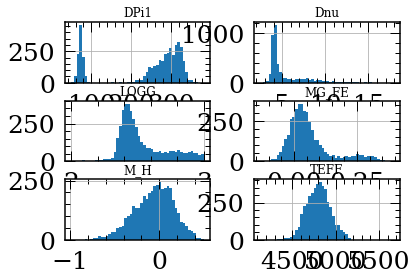

In [67]:
df_pick = df_CM.loc[df_CM['APOGEE_ID'].isin(tr_ID_r)].drop_duplicates(subset='APOGEE_ID',keep='first')[['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu','APOGEE_ID']]
m1 = df_pick['MG_FE']>-500
m2 = df_pick['M_H']>-1
m3 = df_pick['TEFF']>0
m4 = (df_pick['LOGG']<3) & (df_pick['LOGG']>2)

m=m1&m2&m3&m4
df_pick=df_pick[m]

df_pick.hist(bins=50)


print(np.shape(df_pick))


In [68]:
tr_ID_pick=df_pick['APOGEE_ID'].values

m=np.zeros(len(tr_ID_r),dtype='bool')
for i in range(len(m)):
    if tr_ID_r[i] in tr_ID_pick:
        m[i]=1

tr_ID, wl, tr_flux, tr_ivar = tr_ID_r[m], wl_r, tr_flux_r[m,:], tr_ivar_r[m,:]


In [69]:
tr_label=np.zeros((len(tr_ID),6))

for i in range((len(tr_ID))):
    #print(i)
    tr_label[i,:]=df_pick.loc[df_pick['APOGEE_ID']==tr_ID[i]][['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu']].values
               

In [70]:
print(len(tr_ID),np.shape(df_pick))

4304 (4304, 7)


In [71]:
np.shape(tr_label)

(4304, 6)

In [72]:
def _SNR(flux, ivar):
    """ Calculate the SNR of a spectrum, ignoring bad pixels

    Parameters
    ----------
    flux: numpy ndarray
        pixel intensities
    ivar: numpy ndarray
        inverse variances corresponding to flux

    Returns
    -------
    SNR: float
    """
    take = ivar > 0
    SNR = float(np.median(flux[take]*(ivar[take]**0.5)))
    return SNR  

In [73]:
#take = tr_ivar > 0
SNR = np.array([_SNR(*s) for s in zip(tr_flux, tr_ivar)])
    

In [74]:
len(SNR)

4304

In [75]:
m_snr=SNR>100

In [76]:
tr_ID, tr_flux, tr_ivar=tr_ID[m_snr],tr_flux[m_snr,:], tr_ivar[m_snr,:]

In [77]:
tr_label=tr_label[m_snr,:]

In [78]:
print(tr_ID.shape)
print(wl.shape)
print(tr_flux.shape)
print(tr_ivar.shape)
print(tr_label.shape)


(4110,)
(8575,)
(4110, 8575)
(4110, 8575)
(4110, 6)


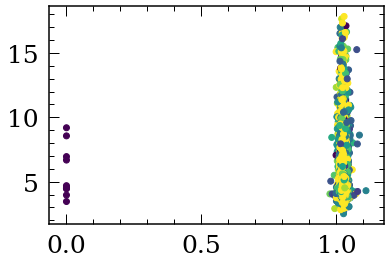

In [56]:
plt.scatter(tr_flux[:,1000],tr_label[:,-1],c=tr_ivar[:,1000])

In [38]:
Ntrain=int(len(tr_label)*0.8)
shuffle_inds = np.arange(len(tr_ID))
np.random.shuffle(shuffle_inds)

train_ID = tr_ID[shuffle_inds[:Ntrain]]
train_flux = tr_flux[shuffle_inds[:Ntrain],:]
train_ivar = tr_ivar[shuffle_inds[:Ntrain],:]
train_label = tr_label[shuffle_inds[:Ntrain],:]

test_ID = tr_ID[shuffle_inds[Ntrain:]]
test_flux = tr_flux[shuffle_inds[Ntrain:],:]
test_ivar = tr_ivar[shuffle_inds[Ntrain:],:]
test_label = tr_label[shuffle_inds[Ntrain:],:]


In [39]:
tr_label

array([[ 6.69944510e-02,  4.72343604e+03,  2.87110639e+00,
         4.22016978e-02,  7.31000000e+01,  8.13000000e+00],
       [-2.11645011e-03,  5.11787256e+03,  2.90108538e+00,
        -5.00611961e-02,  2.16500000e+02,  7.13000000e+00],
       [ 1.72688454e-01,  4.72033203e+03,  2.47463202e+00,
        -3.21602970e-02,  3.10700000e+02,  4.17000000e+00],
       ...,
       [-6.71015456e-02,  4.86201953e+03,  2.48218441e+00,
         1.81387067e-02,  3.26300000e+02,  4.52000000e+00],
       [-2.02681541e-01,  4.99483301e+03,  2.54069138e+00,
         6.76931441e-03,  3.19100000e+02,  5.40000000e+00],
       [ 1.70958444e-01,  4.98354492e+03,  2.76060724e+00,
        -4.14003059e-02,  2.84300000e+02,  6.18000000e+00]])

In [40]:
len(train_label)

3288

In [41]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

ds = dataset.Dataset(wl, train_ID, train_flux, train_ivar, train_label, 
                     test_ID, test_flux, test_ivar, test_label)


Loading dataset
This may take a while...


In [42]:
print(ds.tr_ID)
print(ds.tr_flux)
print(ds.wl)

['2M18474873+4215142' '2M19305589+4318588' '2M18500274+4421398' ...
 '2M19384517+4015098' '2M19224038+4812166' '2M19173696+4117046']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[15100.80154164 15101.01016837 15101.21879797 ... 16999.33764336
 16999.57249951 16999.80735891]


In [43]:
ds.set_label_names(['[Fe/H]','T_{eff}','Log(g)','[Mg/Fe]','D P','D nu'])



Diagnostic for SNRs of reference and survey objects


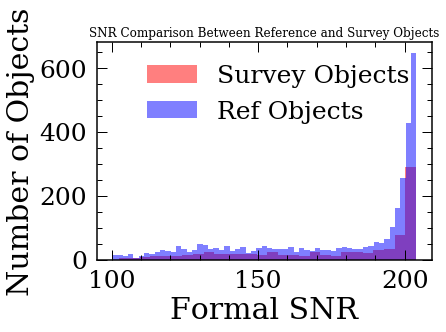

In [44]:
fig = ds.diagnostics_SNR()



Plotting every label against every other


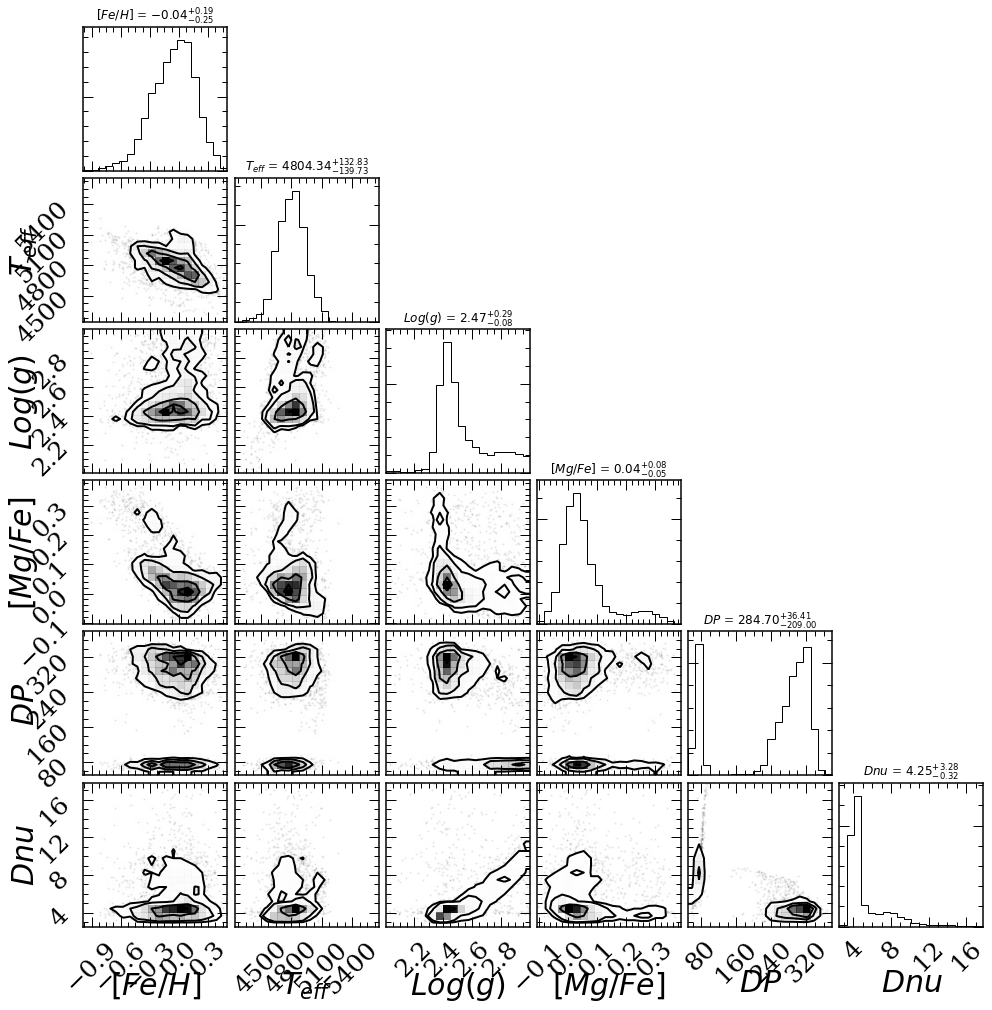

In [45]:
fig = ds.diagnostics_ref_labels()

In [ ]:
ds.ranges = [[371,3192], [3697,5997], [6461,8255]]

In [65]:
pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)


Continuum normalizing the tr set using running quantile...
##########################################################
@Bo Zhang: you will use only 1 process ...
           i.e., the original TheCannon version
##########################################################
contnorm.py: continuum norm using running quantile
Taking spectra in 3 chunks
cont_norm_q(): working on star [1/4493]...
cont_norm_q(): working on star [2/4493]...
cont_norm_q(): working on star [3/4493]...
cont_norm_q(): working on star [4/4493]...
cont_norm_q(): working on star [5/4493]...
cont_norm_q(): working on star [6/4493]...
cont_norm_q(): working on star [7/4493]...
cont_norm_q(): working on star [8/4493]...
cont_norm_q(): working on star [9/4493]...
cont_norm_q(): working on star [10/4493]...
cont_norm_q(): working on star [11/4493]...
cont_norm_q(): working on star [12/4493]...
cont_norm_q(): working on star [13/4493]...
cont_norm_q(): working on star [14/4493]...
cont_norm_q(): working on star [15/4493]...
con

cont_norm_q(): working on star [179/4493]...
cont_norm_q(): working on star [180/4493]...
cont_norm_q(): working on star [181/4493]...
cont_norm_q(): working on star [182/4493]...
cont_norm_q(): working on star [183/4493]...
cont_norm_q(): working on star [184/4493]...
cont_norm_q(): working on star [185/4493]...
cont_norm_q(): working on star [186/4493]...
cont_norm_q(): working on star [187/4493]...
cont_norm_q(): working on star [188/4493]...
cont_norm_q(): working on star [189/4493]...
cont_norm_q(): working on star [190/4493]...
cont_norm_q(): working on star [191/4493]...
cont_norm_q(): working on star [192/4493]...
cont_norm_q(): working on star [193/4493]...
cont_norm_q(): working on star [194/4493]...
cont_norm_q(): working on star [195/4493]...
cont_norm_q(): working on star [196/4493]...
cont_norm_q(): working on star [197/4493]...
cont_norm_q(): working on star [198/4493]...
cont_norm_q(): working on star [199/4493]...
cont_norm_q(): working on star [200/4493]...
cont_norm_

cont_norm_q(): working on star [363/4493]...
cont_norm_q(): working on star [364/4493]...
cont_norm_q(): working on star [365/4493]...
cont_norm_q(): working on star [366/4493]...
cont_norm_q(): working on star [367/4493]...
cont_norm_q(): working on star [368/4493]...
cont_norm_q(): working on star [369/4493]...
cont_norm_q(): working on star [370/4493]...
cont_norm_q(): working on star [371/4493]...
cont_norm_q(): working on star [372/4493]...
cont_norm_q(): working on star [373/4493]...
cont_norm_q(): working on star [374/4493]...
cont_norm_q(): working on star [375/4493]...
cont_norm_q(): working on star [376/4493]...
cont_norm_q(): working on star [377/4493]...
cont_norm_q(): working on star [378/4493]...
cont_norm_q(): working on star [379/4493]...
cont_norm_q(): working on star [380/4493]...
cont_norm_q(): working on star [381/4493]...
cont_norm_q(): working on star [382/4493]...
cont_norm_q(): working on star [383/4493]...
cont_norm_q(): working on star [384/4493]...
cont_norm_

cont_norm_q(): working on star [547/4493]...
cont_norm_q(): working on star [548/4493]...
cont_norm_q(): working on star [549/4493]...
cont_norm_q(): working on star [550/4493]...
cont_norm_q(): working on star [551/4493]...
cont_norm_q(): working on star [552/4493]...
cont_norm_q(): working on star [553/4493]...
cont_norm_q(): working on star [554/4493]...
cont_norm_q(): working on star [555/4493]...
cont_norm_q(): working on star [556/4493]...
cont_norm_q(): working on star [557/4493]...
cont_norm_q(): working on star [558/4493]...
cont_norm_q(): working on star [559/4493]...
cont_norm_q(): working on star [560/4493]...
cont_norm_q(): working on star [561/4493]...
cont_norm_q(): working on star [562/4493]...
cont_norm_q(): working on star [563/4493]...
cont_norm_q(): working on star [564/4493]...
cont_norm_q(): working on star [565/4493]...
cont_norm_q(): working on star [566/4493]...
cont_norm_q(): working on star [567/4493]...
cont_norm_q(): working on star [568/4493]...
cont_norm_

cont_norm_q(): working on star [731/4493]...
cont_norm_q(): working on star [732/4493]...
cont_norm_q(): working on star [733/4493]...
cont_norm_q(): working on star [734/4493]...
cont_norm_q(): working on star [735/4493]...
cont_norm_q(): working on star [736/4493]...
cont_norm_q(): working on star [737/4493]...
cont_norm_q(): working on star [738/4493]...
cont_norm_q(): working on star [739/4493]...
cont_norm_q(): working on star [740/4493]...
cont_norm_q(): working on star [741/4493]...
cont_norm_q(): working on star [742/4493]...
cont_norm_q(): working on star [743/4493]...
cont_norm_q(): working on star [744/4493]...
cont_norm_q(): working on star [745/4493]...
cont_norm_q(): working on star [746/4493]...
cont_norm_q(): working on star [747/4493]...
cont_norm_q(): working on star [748/4493]...
cont_norm_q(): working on star [749/4493]...
cont_norm_q(): working on star [750/4493]...
cont_norm_q(): working on star [751/4493]...
cont_norm_q(): working on star [752/4493]...
cont_norm_

cont_norm_q(): working on star [915/4493]...
cont_norm_q(): working on star [916/4493]...
cont_norm_q(): working on star [917/4493]...
cont_norm_q(): working on star [918/4493]...
cont_norm_q(): working on star [919/4493]...
cont_norm_q(): working on star [920/4493]...
cont_norm_q(): working on star [921/4493]...
cont_norm_q(): working on star [922/4493]...
cont_norm_q(): working on star [923/4493]...
cont_norm_q(): working on star [924/4493]...
cont_norm_q(): working on star [925/4493]...
cont_norm_q(): working on star [926/4493]...
cont_norm_q(): working on star [927/4493]...
cont_norm_q(): working on star [928/4493]...
cont_norm_q(): working on star [929/4493]...
cont_norm_q(): working on star [930/4493]...
cont_norm_q(): working on star [931/4493]...
cont_norm_q(): working on star [932/4493]...
cont_norm_q(): working on star [933/4493]...
cont_norm_q(): working on star [934/4493]...
cont_norm_q(): working on star [935/4493]...
cont_norm_q(): working on star [936/4493]...
cont_norm_

cont_norm_q(): working on star [1095/4493]...
cont_norm_q(): working on star [1096/4493]...
cont_norm_q(): working on star [1097/4493]...
cont_norm_q(): working on star [1098/4493]...
cont_norm_q(): working on star [1099/4493]...
cont_norm_q(): working on star [1100/4493]...
cont_norm_q(): working on star [1101/4493]...
cont_norm_q(): working on star [1102/4493]...
cont_norm_q(): working on star [1103/4493]...
cont_norm_q(): working on star [1104/4493]...
cont_norm_q(): working on star [1105/4493]...
cont_norm_q(): working on star [1106/4493]...
cont_norm_q(): working on star [1107/4493]...
cont_norm_q(): working on star [1108/4493]...
cont_norm_q(): working on star [1109/4493]...
cont_norm_q(): working on star [1110/4493]...
cont_norm_q(): working on star [1111/4493]...
cont_norm_q(): working on star [1112/4493]...
cont_norm_q(): working on star [1113/4493]...
cont_norm_q(): working on star [1114/4493]...
cont_norm_q(): working on star [1115/4493]...
cont_norm_q(): working on star [11

cont_norm_q(): working on star [1275/4493]...
cont_norm_q(): working on star [1276/4493]...
cont_norm_q(): working on star [1277/4493]...
cont_norm_q(): working on star [1278/4493]...
cont_norm_q(): working on star [1279/4493]...
cont_norm_q(): working on star [1280/4493]...
cont_norm_q(): working on star [1281/4493]...
cont_norm_q(): working on star [1282/4493]...
cont_norm_q(): working on star [1283/4493]...
cont_norm_q(): working on star [1284/4493]...
cont_norm_q(): working on star [1285/4493]...
cont_norm_q(): working on star [1286/4493]...
cont_norm_q(): working on star [1287/4493]...
cont_norm_q(): working on star [1288/4493]...
cont_norm_q(): working on star [1289/4493]...
cont_norm_q(): working on star [1290/4493]...
cont_norm_q(): working on star [1291/4493]...
cont_norm_q(): working on star [1292/4493]...
cont_norm_q(): working on star [1293/4493]...
cont_norm_q(): working on star [1294/4493]...
cont_norm_q(): working on star [1295/4493]...
cont_norm_q(): working on star [12

cont_norm_q(): working on star [1455/4493]...
cont_norm_q(): working on star [1456/4493]...
cont_norm_q(): working on star [1457/4493]...
cont_norm_q(): working on star [1458/4493]...
cont_norm_q(): working on star [1459/4493]...
cont_norm_q(): working on star [1460/4493]...
cont_norm_q(): working on star [1461/4493]...
cont_norm_q(): working on star [1462/4493]...
cont_norm_q(): working on star [1463/4493]...
cont_norm_q(): working on star [1464/4493]...
cont_norm_q(): working on star [1465/4493]...
cont_norm_q(): working on star [1466/4493]...
cont_norm_q(): working on star [1467/4493]...
cont_norm_q(): working on star [1468/4493]...
cont_norm_q(): working on star [1469/4493]...
cont_norm_q(): working on star [1470/4493]...
cont_norm_q(): working on star [1471/4493]...
cont_norm_q(): working on star [1472/4493]...
cont_norm_q(): working on star [1473/4493]...
cont_norm_q(): working on star [1474/4493]...
cont_norm_q(): working on star [1475/4493]...
cont_norm_q(): working on star [14

cont_norm_q(): working on star [1635/4493]...
cont_norm_q(): working on star [1636/4493]...
cont_norm_q(): working on star [1637/4493]...
cont_norm_q(): working on star [1638/4493]...
cont_norm_q(): working on star [1639/4493]...
cont_norm_q(): working on star [1640/4493]...
cont_norm_q(): working on star [1641/4493]...
cont_norm_q(): working on star [1642/4493]...
cont_norm_q(): working on star [1643/4493]...
cont_norm_q(): working on star [1644/4493]...
cont_norm_q(): working on star [1645/4493]...
cont_norm_q(): working on star [1646/4493]...
cont_norm_q(): working on star [1647/4493]...
cont_norm_q(): working on star [1648/4493]...
cont_norm_q(): working on star [1649/4493]...
cont_norm_q(): working on star [1650/4493]...
cont_norm_q(): working on star [1651/4493]...
cont_norm_q(): working on star [1652/4493]...
cont_norm_q(): working on star [1653/4493]...
cont_norm_q(): working on star [1654/4493]...
cont_norm_q(): working on star [1655/4493]...
cont_norm_q(): working on star [16

cont_norm_q(): working on star [1815/4493]...
cont_norm_q(): working on star [1816/4493]...
cont_norm_q(): working on star [1817/4493]...
cont_norm_q(): working on star [1818/4493]...
cont_norm_q(): working on star [1819/4493]...
cont_norm_q(): working on star [1820/4493]...
cont_norm_q(): working on star [1821/4493]...
cont_norm_q(): working on star [1822/4493]...
cont_norm_q(): working on star [1823/4493]...
cont_norm_q(): working on star [1824/4493]...
cont_norm_q(): working on star [1825/4493]...
cont_norm_q(): working on star [1826/4493]...
cont_norm_q(): working on star [1827/4493]...
cont_norm_q(): working on star [1828/4493]...
cont_norm_q(): working on star [1829/4493]...
cont_norm_q(): working on star [1830/4493]...
cont_norm_q(): working on star [1831/4493]...
cont_norm_q(): working on star [1832/4493]...
cont_norm_q(): working on star [1833/4493]...
cont_norm_q(): working on star [1834/4493]...
cont_norm_q(): working on star [1835/4493]...
cont_norm_q(): working on star [18

cont_norm_q(): working on star [1995/4493]...
cont_norm_q(): working on star [1996/4493]...
cont_norm_q(): working on star [1997/4493]...
cont_norm_q(): working on star [1998/4493]...
cont_norm_q(): working on star [1999/4493]...
cont_norm_q(): working on star [2000/4493]...
cont_norm_q(): working on star [2001/4493]...
cont_norm_q(): working on star [2002/4493]...
cont_norm_q(): working on star [2003/4493]...
cont_norm_q(): working on star [2004/4493]...
cont_norm_q(): working on star [2005/4493]...
cont_norm_q(): working on star [2006/4493]...
cont_norm_q(): working on star [2007/4493]...
cont_norm_q(): working on star [2008/4493]...
cont_norm_q(): working on star [2009/4493]...
cont_norm_q(): working on star [2010/4493]...
cont_norm_q(): working on star [2011/4493]...
cont_norm_q(): working on star [2012/4493]...
cont_norm_q(): working on star [2013/4493]...
cont_norm_q(): working on star [2014/4493]...
cont_norm_q(): working on star [2015/4493]...
cont_norm_q(): working on star [20

cont_norm_q(): working on star [2175/4493]...
cont_norm_q(): working on star [2176/4493]...
cont_norm_q(): working on star [2177/4493]...
cont_norm_q(): working on star [2178/4493]...
cont_norm_q(): working on star [2179/4493]...
cont_norm_q(): working on star [2180/4493]...
cont_norm_q(): working on star [2181/4493]...
cont_norm_q(): working on star [2182/4493]...
cont_norm_q(): working on star [2183/4493]...
cont_norm_q(): working on star [2184/4493]...
cont_norm_q(): working on star [2185/4493]...
cont_norm_q(): working on star [2186/4493]...
cont_norm_q(): working on star [2187/4493]...
cont_norm_q(): working on star [2188/4493]...
cont_norm_q(): working on star [2189/4493]...
cont_norm_q(): working on star [2190/4493]...
cont_norm_q(): working on star [2191/4493]...
cont_norm_q(): working on star [2192/4493]...
cont_norm_q(): working on star [2193/4493]...
cont_norm_q(): working on star [2194/4493]...
cont_norm_q(): working on star [2195/4493]...
cont_norm_q(): working on star [21

cont_norm_q(): working on star [2355/4493]...
cont_norm_q(): working on star [2356/4493]...
cont_norm_q(): working on star [2357/4493]...
cont_norm_q(): working on star [2358/4493]...
cont_norm_q(): working on star [2359/4493]...
cont_norm_q(): working on star [2360/4493]...
cont_norm_q(): working on star [2361/4493]...
cont_norm_q(): working on star [2362/4493]...
cont_norm_q(): working on star [2363/4493]...
cont_norm_q(): working on star [2364/4493]...
cont_norm_q(): working on star [2365/4493]...
cont_norm_q(): working on star [2366/4493]...
cont_norm_q(): working on star [2367/4493]...
cont_norm_q(): working on star [2368/4493]...
cont_norm_q(): working on star [2369/4493]...
cont_norm_q(): working on star [2370/4493]...
cont_norm_q(): working on star [2371/4493]...
cont_norm_q(): working on star [2372/4493]...
cont_norm_q(): working on star [2373/4493]...
cont_norm_q(): working on star [2374/4493]...
cont_norm_q(): working on star [2375/4493]...
cont_norm_q(): working on star [23

cont_norm_q(): working on star [2535/4493]...
cont_norm_q(): working on star [2536/4493]...
cont_norm_q(): working on star [2537/4493]...
cont_norm_q(): working on star [2538/4493]...
cont_norm_q(): working on star [2539/4493]...
cont_norm_q(): working on star [2540/4493]...
cont_norm_q(): working on star [2541/4493]...
cont_norm_q(): working on star [2542/4493]...
cont_norm_q(): working on star [2543/4493]...
cont_norm_q(): working on star [2544/4493]...
cont_norm_q(): working on star [2545/4493]...
cont_norm_q(): working on star [2546/4493]...
cont_norm_q(): working on star [2547/4493]...
cont_norm_q(): working on star [2548/4493]...
cont_norm_q(): working on star [2549/4493]...
cont_norm_q(): working on star [2550/4493]...
cont_norm_q(): working on star [2551/4493]...
cont_norm_q(): working on star [2552/4493]...
cont_norm_q(): working on star [2553/4493]...
cont_norm_q(): working on star [2554/4493]...
cont_norm_q(): working on star [2555/4493]...
cont_norm_q(): working on star [25

cont_norm_q(): working on star [2715/4493]...
cont_norm_q(): working on star [2716/4493]...
cont_norm_q(): working on star [2717/4493]...
cont_norm_q(): working on star [2718/4493]...
cont_norm_q(): working on star [2719/4493]...
cont_norm_q(): working on star [2720/4493]...
cont_norm_q(): working on star [2721/4493]...
cont_norm_q(): working on star [2722/4493]...
cont_norm_q(): working on star [2723/4493]...
cont_norm_q(): working on star [2724/4493]...
cont_norm_q(): working on star [2725/4493]...
cont_norm_q(): working on star [2726/4493]...
cont_norm_q(): working on star [2727/4493]...
cont_norm_q(): working on star [2728/4493]...
cont_norm_q(): working on star [2729/4493]...
cont_norm_q(): working on star [2730/4493]...
cont_norm_q(): working on star [2731/4493]...
cont_norm_q(): working on star [2732/4493]...
cont_norm_q(): working on star [2733/4493]...
cont_norm_q(): working on star [2734/4493]...
cont_norm_q(): working on star [2735/4493]...
cont_norm_q(): working on star [27

cont_norm_q(): working on star [2895/4493]...
cont_norm_q(): working on star [2896/4493]...
cont_norm_q(): working on star [2897/4493]...
cont_norm_q(): working on star [2898/4493]...
cont_norm_q(): working on star [2899/4493]...
cont_norm_q(): working on star [2900/4493]...
cont_norm_q(): working on star [2901/4493]...
cont_norm_q(): working on star [2902/4493]...
cont_norm_q(): working on star [2903/4493]...
cont_norm_q(): working on star [2904/4493]...
cont_norm_q(): working on star [2905/4493]...
cont_norm_q(): working on star [2906/4493]...
cont_norm_q(): working on star [2907/4493]...
cont_norm_q(): working on star [2908/4493]...
cont_norm_q(): working on star [2909/4493]...
cont_norm_q(): working on star [2910/4493]...
cont_norm_q(): working on star [2911/4493]...
cont_norm_q(): working on star [2912/4493]...
cont_norm_q(): working on star [2913/4493]...
cont_norm_q(): working on star [2914/4493]...
cont_norm_q(): working on star [2915/4493]...
cont_norm_q(): working on star [29

cont_norm_q(): working on star [3075/4493]...
cont_norm_q(): working on star [3076/4493]...
cont_norm_q(): working on star [3077/4493]...
cont_norm_q(): working on star [3078/4493]...
cont_norm_q(): working on star [3079/4493]...
cont_norm_q(): working on star [3080/4493]...
cont_norm_q(): working on star [3081/4493]...
cont_norm_q(): working on star [3082/4493]...
cont_norm_q(): working on star [3083/4493]...
cont_norm_q(): working on star [3084/4493]...
cont_norm_q(): working on star [3085/4493]...
cont_norm_q(): working on star [3086/4493]...
cont_norm_q(): working on star [3087/4493]...
cont_norm_q(): working on star [3088/4493]...
cont_norm_q(): working on star [3089/4493]...
cont_norm_q(): working on star [3090/4493]...
cont_norm_q(): working on star [3091/4493]...
cont_norm_q(): working on star [3092/4493]...
cont_norm_q(): working on star [3093/4493]...
cont_norm_q(): working on star [3094/4493]...
cont_norm_q(): working on star [3095/4493]...
cont_norm_q(): working on star [30

cont_norm_q(): working on star [3255/4493]...
cont_norm_q(): working on star [3256/4493]...
cont_norm_q(): working on star [3257/4493]...
cont_norm_q(): working on star [3258/4493]...
cont_norm_q(): working on star [3259/4493]...
cont_norm_q(): working on star [3260/4493]...
cont_norm_q(): working on star [3261/4493]...
cont_norm_q(): working on star [3262/4493]...
cont_norm_q(): working on star [3263/4493]...
cont_norm_q(): working on star [3264/4493]...
cont_norm_q(): working on star [3265/4493]...
cont_norm_q(): working on star [3266/4493]...
cont_norm_q(): working on star [3267/4493]...
cont_norm_q(): working on star [3268/4493]...
cont_norm_q(): working on star [3269/4493]...
cont_norm_q(): working on star [3270/4493]...
cont_norm_q(): working on star [3271/4493]...
cont_norm_q(): working on star [3272/4493]...
cont_norm_q(): working on star [3273/4493]...
cont_norm_q(): working on star [3274/4493]...
cont_norm_q(): working on star [3275/4493]...
cont_norm_q(): working on star [32

cont_norm_q(): working on star [3435/4493]...
cont_norm_q(): working on star [3436/4493]...
cont_norm_q(): working on star [3437/4493]...
cont_norm_q(): working on star [3438/4493]...
cont_norm_q(): working on star [3439/4493]...
cont_norm_q(): working on star [3440/4493]...
cont_norm_q(): working on star [3441/4493]...
cont_norm_q(): working on star [3442/4493]...
cont_norm_q(): working on star [3443/4493]...
cont_norm_q(): working on star [3444/4493]...
cont_norm_q(): working on star [3445/4493]...
cont_norm_q(): working on star [3446/4493]...
cont_norm_q(): working on star [3447/4493]...
cont_norm_q(): working on star [3448/4493]...
cont_norm_q(): working on star [3449/4493]...
cont_norm_q(): working on star [3450/4493]...
cont_norm_q(): working on star [3451/4493]...
cont_norm_q(): working on star [3452/4493]...
cont_norm_q(): working on star [3453/4493]...
cont_norm_q(): working on star [3454/4493]...
cont_norm_q(): working on star [3455/4493]...
cont_norm_q(): working on star [34

cont_norm_q(): working on star [3615/4493]...
cont_norm_q(): working on star [3616/4493]...
cont_norm_q(): working on star [3617/4493]...
cont_norm_q(): working on star [3618/4493]...
cont_norm_q(): working on star [3619/4493]...
cont_norm_q(): working on star [3620/4493]...
cont_norm_q(): working on star [3621/4493]...
cont_norm_q(): working on star [3622/4493]...
cont_norm_q(): working on star [3623/4493]...
cont_norm_q(): working on star [3624/4493]...
cont_norm_q(): working on star [3625/4493]...
cont_norm_q(): working on star [3626/4493]...
cont_norm_q(): working on star [3627/4493]...
cont_norm_q(): working on star [3628/4493]...
cont_norm_q(): working on star [3629/4493]...
cont_norm_q(): working on star [3630/4493]...
cont_norm_q(): working on star [3631/4493]...
cont_norm_q(): working on star [3632/4493]...
cont_norm_q(): working on star [3633/4493]...
cont_norm_q(): working on star [3634/4493]...
cont_norm_q(): working on star [3635/4493]...
cont_norm_q(): working on star [36

cont_norm_q(): working on star [3795/4493]...
cont_norm_q(): working on star [3796/4493]...
cont_norm_q(): working on star [3797/4493]...
cont_norm_q(): working on star [3798/4493]...
cont_norm_q(): working on star [3799/4493]...
cont_norm_q(): working on star [3800/4493]...
cont_norm_q(): working on star [3801/4493]...
cont_norm_q(): working on star [3802/4493]...
cont_norm_q(): working on star [3803/4493]...
cont_norm_q(): working on star [3804/4493]...
cont_norm_q(): working on star [3805/4493]...
cont_norm_q(): working on star [3806/4493]...
cont_norm_q(): working on star [3807/4493]...
cont_norm_q(): working on star [3808/4493]...
cont_norm_q(): working on star [3809/4493]...
cont_norm_q(): working on star [3810/4493]...
cont_norm_q(): working on star [3811/4493]...
cont_norm_q(): working on star [3812/4493]...
cont_norm_q(): working on star [3813/4493]...
cont_norm_q(): working on star [3814/4493]...
cont_norm_q(): working on star [3815/4493]...
cont_norm_q(): working on star [38

cont_norm_q(): working on star [3975/4493]...
cont_norm_q(): working on star [3976/4493]...
cont_norm_q(): working on star [3977/4493]...
cont_norm_q(): working on star [3978/4493]...
cont_norm_q(): working on star [3979/4493]...
cont_norm_q(): working on star [3980/4493]...
cont_norm_q(): working on star [3981/4493]...
cont_norm_q(): working on star [3982/4493]...
cont_norm_q(): working on star [3983/4493]...
cont_norm_q(): working on star [3984/4493]...
cont_norm_q(): working on star [3985/4493]...
cont_norm_q(): working on star [3986/4493]...
cont_norm_q(): working on star [3987/4493]...
cont_norm_q(): working on star [3988/4493]...
cont_norm_q(): working on star [3989/4493]...
cont_norm_q(): working on star [3990/4493]...
cont_norm_q(): working on star [3991/4493]...
cont_norm_q(): working on star [3992/4493]...
cont_norm_q(): working on star [3993/4493]...
cont_norm_q(): working on star [3994/4493]...
cont_norm_q(): working on star [3995/4493]...
cont_norm_q(): working on star [39

cont_norm_q(): working on star [4155/4493]...
cont_norm_q(): working on star [4156/4493]...
cont_norm_q(): working on star [4157/4493]...
cont_norm_q(): working on star [4158/4493]...
cont_norm_q(): working on star [4159/4493]...
cont_norm_q(): working on star [4160/4493]...
cont_norm_q(): working on star [4161/4493]...
cont_norm_q(): working on star [4162/4493]...
cont_norm_q(): working on star [4163/4493]...
cont_norm_q(): working on star [4164/4493]...
cont_norm_q(): working on star [4165/4493]...
cont_norm_q(): working on star [4166/4493]...
cont_norm_q(): working on star [4167/4493]...
cont_norm_q(): working on star [4168/4493]...
cont_norm_q(): working on star [4169/4493]...
cont_norm_q(): working on star [4170/4493]...
cont_norm_q(): working on star [4171/4493]...
cont_norm_q(): working on star [4172/4493]...
cont_norm_q(): working on star [4173/4493]...
cont_norm_q(): working on star [4174/4493]...
cont_norm_q(): working on star [4175/4493]...
cont_norm_q(): working on star [41

cont_norm_q(): working on star [4335/4493]...
cont_norm_q(): working on star [4336/4493]...
cont_norm_q(): working on star [4337/4493]...
cont_norm_q(): working on star [4338/4493]...
cont_norm_q(): working on star [4339/4493]...
cont_norm_q(): working on star [4340/4493]...
cont_norm_q(): working on star [4341/4493]...
cont_norm_q(): working on star [4342/4493]...
cont_norm_q(): working on star [4343/4493]...
cont_norm_q(): working on star [4344/4493]...
cont_norm_q(): working on star [4345/4493]...
cont_norm_q(): working on star [4346/4493]...
cont_norm_q(): working on star [4347/4493]...
cont_norm_q(): working on star [4348/4493]...
cont_norm_q(): working on star [4349/4493]...
cont_norm_q(): working on star [4350/4493]...
cont_norm_q(): working on star [4351/4493]...
cont_norm_q(): working on star [4352/4493]...
cont_norm_q(): working on star [4353/4493]...
cont_norm_q(): working on star [4354/4493]...
cont_norm_q(): working on star [4355/4493]...
cont_norm_q(): working on star [43

cont_norm_q(): working on star [23/4493]...
cont_norm_q(): working on star [24/4493]...
cont_norm_q(): working on star [25/4493]...
cont_norm_q(): working on star [26/4493]...
cont_norm_q(): working on star [27/4493]...
cont_norm_q(): working on star [28/4493]...
cont_norm_q(): working on star [29/4493]...
cont_norm_q(): working on star [30/4493]...
cont_norm_q(): working on star [31/4493]...
cont_norm_q(): working on star [32/4493]...
cont_norm_q(): working on star [33/4493]...
cont_norm_q(): working on star [34/4493]...
cont_norm_q(): working on star [35/4493]...
cont_norm_q(): working on star [36/4493]...
cont_norm_q(): working on star [37/4493]...
cont_norm_q(): working on star [38/4493]...
cont_norm_q(): working on star [39/4493]...
cont_norm_q(): working on star [40/4493]...
cont_norm_q(): working on star [41/4493]...
cont_norm_q(): working on star [42/4493]...
cont_norm_q(): working on star [43/4493]...
cont_norm_q(): working on star [44/4493]...
cont_norm_q(): working on star [

cont_norm_q(): working on star [207/4493]...
cont_norm_q(): working on star [208/4493]...
cont_norm_q(): working on star [209/4493]...
cont_norm_q(): working on star [210/4493]...
cont_norm_q(): working on star [211/4493]...
cont_norm_q(): working on star [212/4493]...
cont_norm_q(): working on star [213/4493]...
cont_norm_q(): working on star [214/4493]...
cont_norm_q(): working on star [215/4493]...
cont_norm_q(): working on star [216/4493]...
cont_norm_q(): working on star [217/4493]...
cont_norm_q(): working on star [218/4493]...
cont_norm_q(): working on star [219/4493]...
cont_norm_q(): working on star [220/4493]...
cont_norm_q(): working on star [221/4493]...
cont_norm_q(): working on star [222/4493]...
cont_norm_q(): working on star [223/4493]...
cont_norm_q(): working on star [224/4493]...
cont_norm_q(): working on star [225/4493]...
cont_norm_q(): working on star [226/4493]...
cont_norm_q(): working on star [227/4493]...
cont_norm_q(): working on star [228/4493]...
cont_norm_

cont_norm_q(): working on star [391/4493]...
cont_norm_q(): working on star [392/4493]...
cont_norm_q(): working on star [393/4493]...
cont_norm_q(): working on star [394/4493]...
cont_norm_q(): working on star [395/4493]...
cont_norm_q(): working on star [396/4493]...
cont_norm_q(): working on star [397/4493]...
cont_norm_q(): working on star [398/4493]...
cont_norm_q(): working on star [399/4493]...
cont_norm_q(): working on star [400/4493]...
cont_norm_q(): working on star [401/4493]...
cont_norm_q(): working on star [402/4493]...
cont_norm_q(): working on star [403/4493]...
cont_norm_q(): working on star [404/4493]...
cont_norm_q(): working on star [405/4493]...
cont_norm_q(): working on star [406/4493]...
cont_norm_q(): working on star [407/4493]...
cont_norm_q(): working on star [408/4493]...
cont_norm_q(): working on star [409/4493]...
cont_norm_q(): working on star [410/4493]...
cont_norm_q(): working on star [411/4493]...
cont_norm_q(): working on star [412/4493]...
cont_norm_

cont_norm_q(): working on star [575/4493]...
cont_norm_q(): working on star [576/4493]...
cont_norm_q(): working on star [577/4493]...
cont_norm_q(): working on star [578/4493]...
cont_norm_q(): working on star [579/4493]...
cont_norm_q(): working on star [580/4493]...
cont_norm_q(): working on star [581/4493]...
cont_norm_q(): working on star [582/4493]...
cont_norm_q(): working on star [583/4493]...
cont_norm_q(): working on star [584/4493]...
cont_norm_q(): working on star [585/4493]...
cont_norm_q(): working on star [586/4493]...
cont_norm_q(): working on star [587/4493]...
cont_norm_q(): working on star [588/4493]...
cont_norm_q(): working on star [589/4493]...
cont_norm_q(): working on star [590/4493]...
cont_norm_q(): working on star [591/4493]...
cont_norm_q(): working on star [592/4493]...
cont_norm_q(): working on star [593/4493]...
cont_norm_q(): working on star [594/4493]...
cont_norm_q(): working on star [595/4493]...
cont_norm_q(): working on star [596/4493]...
cont_norm_

cont_norm_q(): working on star [759/4493]...
cont_norm_q(): working on star [760/4493]...
cont_norm_q(): working on star [761/4493]...
cont_norm_q(): working on star [762/4493]...
cont_norm_q(): working on star [763/4493]...
cont_norm_q(): working on star [764/4493]...
cont_norm_q(): working on star [765/4493]...
cont_norm_q(): working on star [766/4493]...
cont_norm_q(): working on star [767/4493]...
cont_norm_q(): working on star [768/4493]...
cont_norm_q(): working on star [769/4493]...
cont_norm_q(): working on star [770/4493]...
cont_norm_q(): working on star [771/4493]...
cont_norm_q(): working on star [772/4493]...
cont_norm_q(): working on star [773/4493]...
cont_norm_q(): working on star [774/4493]...
cont_norm_q(): working on star [775/4493]...
cont_norm_q(): working on star [776/4493]...
cont_norm_q(): working on star [777/4493]...
cont_norm_q(): working on star [778/4493]...
cont_norm_q(): working on star [779/4493]...
cont_norm_q(): working on star [780/4493]...
cont_norm_

cont_norm_q(): working on star [943/4493]...
cont_norm_q(): working on star [944/4493]...
cont_norm_q(): working on star [945/4493]...
cont_norm_q(): working on star [946/4493]...
cont_norm_q(): working on star [947/4493]...
cont_norm_q(): working on star [948/4493]...
cont_norm_q(): working on star [949/4493]...
cont_norm_q(): working on star [950/4493]...
cont_norm_q(): working on star [951/4493]...
cont_norm_q(): working on star [952/4493]...
cont_norm_q(): working on star [953/4493]...
cont_norm_q(): working on star [954/4493]...
cont_norm_q(): working on star [955/4493]...
cont_norm_q(): working on star [956/4493]...
cont_norm_q(): working on star [957/4493]...
cont_norm_q(): working on star [958/4493]...
cont_norm_q(): working on star [959/4493]...
cont_norm_q(): working on star [960/4493]...
cont_norm_q(): working on star [961/4493]...
cont_norm_q(): working on star [962/4493]...
cont_norm_q(): working on star [963/4493]...
cont_norm_q(): working on star [964/4493]...
cont_norm_

cont_norm_q(): working on star [1123/4493]...
cont_norm_q(): working on star [1124/4493]...
cont_norm_q(): working on star [1125/4493]...
cont_norm_q(): working on star [1126/4493]...
cont_norm_q(): working on star [1127/4493]...
cont_norm_q(): working on star [1128/4493]...
cont_norm_q(): working on star [1129/4493]...
cont_norm_q(): working on star [1130/4493]...
cont_norm_q(): working on star [1131/4493]...
cont_norm_q(): working on star [1132/4493]...
cont_norm_q(): working on star [1133/4493]...
cont_norm_q(): working on star [1134/4493]...
cont_norm_q(): working on star [1135/4493]...
cont_norm_q(): working on star [1136/4493]...
cont_norm_q(): working on star [1137/4493]...
cont_norm_q(): working on star [1138/4493]...
cont_norm_q(): working on star [1139/4493]...
cont_norm_q(): working on star [1140/4493]...
cont_norm_q(): working on star [1141/4493]...
cont_norm_q(): working on star [1142/4493]...
cont_norm_q(): working on star [1143/4493]...
cont_norm_q(): working on star [11

cont_norm_q(): working on star [1303/4493]...
cont_norm_q(): working on star [1304/4493]...
cont_norm_q(): working on star [1305/4493]...
cont_norm_q(): working on star [1306/4493]...
cont_norm_q(): working on star [1307/4493]...
cont_norm_q(): working on star [1308/4493]...
cont_norm_q(): working on star [1309/4493]...
cont_norm_q(): working on star [1310/4493]...
cont_norm_q(): working on star [1311/4493]...
cont_norm_q(): working on star [1312/4493]...
cont_norm_q(): working on star [1313/4493]...
cont_norm_q(): working on star [1314/4493]...
cont_norm_q(): working on star [1315/4493]...
cont_norm_q(): working on star [1316/4493]...
cont_norm_q(): working on star [1317/4493]...
cont_norm_q(): working on star [1318/4493]...
cont_norm_q(): working on star [1319/4493]...
cont_norm_q(): working on star [1320/4493]...
cont_norm_q(): working on star [1321/4493]...
cont_norm_q(): working on star [1322/4493]...
cont_norm_q(): working on star [1323/4493]...
cont_norm_q(): working on star [13

cont_norm_q(): working on star [1483/4493]...
cont_norm_q(): working on star [1484/4493]...
cont_norm_q(): working on star [1485/4493]...
cont_norm_q(): working on star [1486/4493]...
cont_norm_q(): working on star [1487/4493]...
cont_norm_q(): working on star [1488/4493]...
cont_norm_q(): working on star [1489/4493]...
cont_norm_q(): working on star [1490/4493]...
cont_norm_q(): working on star [1491/4493]...
cont_norm_q(): working on star [1492/4493]...
cont_norm_q(): working on star [1493/4493]...
cont_norm_q(): working on star [1494/4493]...
cont_norm_q(): working on star [1495/4493]...
cont_norm_q(): working on star [1496/4493]...
cont_norm_q(): working on star [1497/4493]...
cont_norm_q(): working on star [1498/4493]...
cont_norm_q(): working on star [1499/4493]...
cont_norm_q(): working on star [1500/4493]...
cont_norm_q(): working on star [1501/4493]...
cont_norm_q(): working on star [1502/4493]...
cont_norm_q(): working on star [1503/4493]...
cont_norm_q(): working on star [15

cont_norm_q(): working on star [1663/4493]...
cont_norm_q(): working on star [1664/4493]...
cont_norm_q(): working on star [1665/4493]...
cont_norm_q(): working on star [1666/4493]...
cont_norm_q(): working on star [1667/4493]...
cont_norm_q(): working on star [1668/4493]...
cont_norm_q(): working on star [1669/4493]...
cont_norm_q(): working on star [1670/4493]...
cont_norm_q(): working on star [1671/4493]...
cont_norm_q(): working on star [1672/4493]...
cont_norm_q(): working on star [1673/4493]...
cont_norm_q(): working on star [1674/4493]...
cont_norm_q(): working on star [1675/4493]...
cont_norm_q(): working on star [1676/4493]...
cont_norm_q(): working on star [1677/4493]...
cont_norm_q(): working on star [1678/4493]...
cont_norm_q(): working on star [1679/4493]...
cont_norm_q(): working on star [1680/4493]...
cont_norm_q(): working on star [1681/4493]...
cont_norm_q(): working on star [1682/4493]...
cont_norm_q(): working on star [1683/4493]...
cont_norm_q(): working on star [16

cont_norm_q(): working on star [1843/4493]...
cont_norm_q(): working on star [1844/4493]...
cont_norm_q(): working on star [1845/4493]...
cont_norm_q(): working on star [1846/4493]...
cont_norm_q(): working on star [1847/4493]...
cont_norm_q(): working on star [1848/4493]...
cont_norm_q(): working on star [1849/4493]...
cont_norm_q(): working on star [1850/4493]...
cont_norm_q(): working on star [1851/4493]...
cont_norm_q(): working on star [1852/4493]...
cont_norm_q(): working on star [1853/4493]...
cont_norm_q(): working on star [1854/4493]...
cont_norm_q(): working on star [1855/4493]...
cont_norm_q(): working on star [1856/4493]...
cont_norm_q(): working on star [1857/4493]...
cont_norm_q(): working on star [1858/4493]...
cont_norm_q(): working on star [1859/4493]...
cont_norm_q(): working on star [1860/4493]...
cont_norm_q(): working on star [1861/4493]...
cont_norm_q(): working on star [1862/4493]...
cont_norm_q(): working on star [1863/4493]...
cont_norm_q(): working on star [18

cont_norm_q(): working on star [2023/4493]...
cont_norm_q(): working on star [2024/4493]...
cont_norm_q(): working on star [2025/4493]...
cont_norm_q(): working on star [2026/4493]...
cont_norm_q(): working on star [2027/4493]...
cont_norm_q(): working on star [2028/4493]...
cont_norm_q(): working on star [2029/4493]...
cont_norm_q(): working on star [2030/4493]...
cont_norm_q(): working on star [2031/4493]...
cont_norm_q(): working on star [2032/4493]...
cont_norm_q(): working on star [2033/4493]...
cont_norm_q(): working on star [2034/4493]...
cont_norm_q(): working on star [2035/4493]...
cont_norm_q(): working on star [2036/4493]...
cont_norm_q(): working on star [2037/4493]...
cont_norm_q(): working on star [2038/4493]...
cont_norm_q(): working on star [2039/4493]...
cont_norm_q(): working on star [2040/4493]...
cont_norm_q(): working on star [2041/4493]...
cont_norm_q(): working on star [2042/4493]...
cont_norm_q(): working on star [2043/4493]...
cont_norm_q(): working on star [20

cont_norm_q(): working on star [2203/4493]...
cont_norm_q(): working on star [2204/4493]...
cont_norm_q(): working on star [2205/4493]...
cont_norm_q(): working on star [2206/4493]...
cont_norm_q(): working on star [2207/4493]...
cont_norm_q(): working on star [2208/4493]...
cont_norm_q(): working on star [2209/4493]...
cont_norm_q(): working on star [2210/4493]...
cont_norm_q(): working on star [2211/4493]...
cont_norm_q(): working on star [2212/4493]...
cont_norm_q(): working on star [2213/4493]...
cont_norm_q(): working on star [2214/4493]...
cont_norm_q(): working on star [2215/4493]...
cont_norm_q(): working on star [2216/4493]...
cont_norm_q(): working on star [2217/4493]...
cont_norm_q(): working on star [2218/4493]...
cont_norm_q(): working on star [2219/4493]...
cont_norm_q(): working on star [2220/4493]...
cont_norm_q(): working on star [2221/4493]...
cont_norm_q(): working on star [2222/4493]...
cont_norm_q(): working on star [2223/4493]...
cont_norm_q(): working on star [22

cont_norm_q(): working on star [2383/4493]...
cont_norm_q(): working on star [2384/4493]...
cont_norm_q(): working on star [2385/4493]...
cont_norm_q(): working on star [2386/4493]...
cont_norm_q(): working on star [2387/4493]...
cont_norm_q(): working on star [2388/4493]...
cont_norm_q(): working on star [2389/4493]...
cont_norm_q(): working on star [2390/4493]...
cont_norm_q(): working on star [2391/4493]...
cont_norm_q(): working on star [2392/4493]...
cont_norm_q(): working on star [2393/4493]...
cont_norm_q(): working on star [2394/4493]...
cont_norm_q(): working on star [2395/4493]...
cont_norm_q(): working on star [2396/4493]...
cont_norm_q(): working on star [2397/4493]...
cont_norm_q(): working on star [2398/4493]...
cont_norm_q(): working on star [2399/4493]...
cont_norm_q(): working on star [2400/4493]...
cont_norm_q(): working on star [2401/4493]...
cont_norm_q(): working on star [2402/4493]...
cont_norm_q(): working on star [2403/4493]...
cont_norm_q(): working on star [24

cont_norm_q(): working on star [2563/4493]...
cont_norm_q(): working on star [2564/4493]...
cont_norm_q(): working on star [2565/4493]...
cont_norm_q(): working on star [2566/4493]...
cont_norm_q(): working on star [2567/4493]...
cont_norm_q(): working on star [2568/4493]...
cont_norm_q(): working on star [2569/4493]...
cont_norm_q(): working on star [2570/4493]...
cont_norm_q(): working on star [2571/4493]...
cont_norm_q(): working on star [2572/4493]...
cont_norm_q(): working on star [2573/4493]...
cont_norm_q(): working on star [2574/4493]...
cont_norm_q(): working on star [2575/4493]...
cont_norm_q(): working on star [2576/4493]...
cont_norm_q(): working on star [2577/4493]...
cont_norm_q(): working on star [2578/4493]...
cont_norm_q(): working on star [2579/4493]...
cont_norm_q(): working on star [2580/4493]...
cont_norm_q(): working on star [2581/4493]...
cont_norm_q(): working on star [2582/4493]...
cont_norm_q(): working on star [2583/4493]...
cont_norm_q(): working on star [25

cont_norm_q(): working on star [2743/4493]...
cont_norm_q(): working on star [2744/4493]...
cont_norm_q(): working on star [2745/4493]...
cont_norm_q(): working on star [2746/4493]...
cont_norm_q(): working on star [2747/4493]...
cont_norm_q(): working on star [2748/4493]...
cont_norm_q(): working on star [2749/4493]...
cont_norm_q(): working on star [2750/4493]...
cont_norm_q(): working on star [2751/4493]...
cont_norm_q(): working on star [2752/4493]...
cont_norm_q(): working on star [2753/4493]...
cont_norm_q(): working on star [2754/4493]...
cont_norm_q(): working on star [2755/4493]...
cont_norm_q(): working on star [2756/4493]...
cont_norm_q(): working on star [2757/4493]...
cont_norm_q(): working on star [2758/4493]...
cont_norm_q(): working on star [2759/4493]...
cont_norm_q(): working on star [2760/4493]...
cont_norm_q(): working on star [2761/4493]...
cont_norm_q(): working on star [2762/4493]...
cont_norm_q(): working on star [2763/4493]...
cont_norm_q(): working on star [27

cont_norm_q(): working on star [2923/4493]...
cont_norm_q(): working on star [2924/4493]...
cont_norm_q(): working on star [2925/4493]...
cont_norm_q(): working on star [2926/4493]...
cont_norm_q(): working on star [2927/4493]...
cont_norm_q(): working on star [2928/4493]...
cont_norm_q(): working on star [2929/4493]...
cont_norm_q(): working on star [2930/4493]...
cont_norm_q(): working on star [2931/4493]...
cont_norm_q(): working on star [2932/4493]...
cont_norm_q(): working on star [2933/4493]...
cont_norm_q(): working on star [2934/4493]...
cont_norm_q(): working on star [2935/4493]...
cont_norm_q(): working on star [2936/4493]...
cont_norm_q(): working on star [2937/4493]...
cont_norm_q(): working on star [2938/4493]...
cont_norm_q(): working on star [2939/4493]...
cont_norm_q(): working on star [2940/4493]...
cont_norm_q(): working on star [2941/4493]...
cont_norm_q(): working on star [2942/4493]...
cont_norm_q(): working on star [2943/4493]...
cont_norm_q(): working on star [29

cont_norm_q(): working on star [3103/4493]...
cont_norm_q(): working on star [3104/4493]...
cont_norm_q(): working on star [3105/4493]...
cont_norm_q(): working on star [3106/4493]...
cont_norm_q(): working on star [3107/4493]...
cont_norm_q(): working on star [3108/4493]...
cont_norm_q(): working on star [3109/4493]...
cont_norm_q(): working on star [3110/4493]...
cont_norm_q(): working on star [3111/4493]...
cont_norm_q(): working on star [3112/4493]...
cont_norm_q(): working on star [3113/4493]...
cont_norm_q(): working on star [3114/4493]...
cont_norm_q(): working on star [3115/4493]...
cont_norm_q(): working on star [3116/4493]...
cont_norm_q(): working on star [3117/4493]...
cont_norm_q(): working on star [3118/4493]...
cont_norm_q(): working on star [3119/4493]...
cont_norm_q(): working on star [3120/4493]...
cont_norm_q(): working on star [3121/4493]...
cont_norm_q(): working on star [3122/4493]...
cont_norm_q(): working on star [3123/4493]...
cont_norm_q(): working on star [31

cont_norm_q(): working on star [3283/4493]...
cont_norm_q(): working on star [3284/4493]...
cont_norm_q(): working on star [3285/4493]...
cont_norm_q(): working on star [3286/4493]...
cont_norm_q(): working on star [3287/4493]...
cont_norm_q(): working on star [3288/4493]...
cont_norm_q(): working on star [3289/4493]...
cont_norm_q(): working on star [3290/4493]...
cont_norm_q(): working on star [3291/4493]...
cont_norm_q(): working on star [3292/4493]...
cont_norm_q(): working on star [3293/4493]...
cont_norm_q(): working on star [3294/4493]...
cont_norm_q(): working on star [3295/4493]...
cont_norm_q(): working on star [3296/4493]...
cont_norm_q(): working on star [3297/4493]...
cont_norm_q(): working on star [3298/4493]...
cont_norm_q(): working on star [3299/4493]...
cont_norm_q(): working on star [3300/4493]...
cont_norm_q(): working on star [3301/4493]...
cont_norm_q(): working on star [3302/4493]...
cont_norm_q(): working on star [3303/4493]...
cont_norm_q(): working on star [33

cont_norm_q(): working on star [3463/4493]...
cont_norm_q(): working on star [3464/4493]...
cont_norm_q(): working on star [3465/4493]...
cont_norm_q(): working on star [3466/4493]...
cont_norm_q(): working on star [3467/4493]...
cont_norm_q(): working on star [3468/4493]...
cont_norm_q(): working on star [3469/4493]...
cont_norm_q(): working on star [3470/4493]...
cont_norm_q(): working on star [3471/4493]...
cont_norm_q(): working on star [3472/4493]...
cont_norm_q(): working on star [3473/4493]...
cont_norm_q(): working on star [3474/4493]...
cont_norm_q(): working on star [3475/4493]...
cont_norm_q(): working on star [3476/4493]...
cont_norm_q(): working on star [3477/4493]...
cont_norm_q(): working on star [3478/4493]...
cont_norm_q(): working on star [3479/4493]...
cont_norm_q(): working on star [3480/4493]...
cont_norm_q(): working on star [3481/4493]...
cont_norm_q(): working on star [3482/4493]...
cont_norm_q(): working on star [3483/4493]...
cont_norm_q(): working on star [34

cont_norm_q(): working on star [3643/4493]...
cont_norm_q(): working on star [3644/4493]...
cont_norm_q(): working on star [3645/4493]...
cont_norm_q(): working on star [3646/4493]...
cont_norm_q(): working on star [3647/4493]...
cont_norm_q(): working on star [3648/4493]...
cont_norm_q(): working on star [3649/4493]...
cont_norm_q(): working on star [3650/4493]...
cont_norm_q(): working on star [3651/4493]...
cont_norm_q(): working on star [3652/4493]...
cont_norm_q(): working on star [3653/4493]...
cont_norm_q(): working on star [3654/4493]...
cont_norm_q(): working on star [3655/4493]...
cont_norm_q(): working on star [3656/4493]...
cont_norm_q(): working on star [3657/4493]...
cont_norm_q(): working on star [3658/4493]...
cont_norm_q(): working on star [3659/4493]...
cont_norm_q(): working on star [3660/4493]...
cont_norm_q(): working on star [3661/4493]...
cont_norm_q(): working on star [3662/4493]...
cont_norm_q(): working on star [3663/4493]...
cont_norm_q(): working on star [36

cont_norm_q(): working on star [3823/4493]...
cont_norm_q(): working on star [3824/4493]...
cont_norm_q(): working on star [3825/4493]...
cont_norm_q(): working on star [3826/4493]...
cont_norm_q(): working on star [3827/4493]...
cont_norm_q(): working on star [3828/4493]...
cont_norm_q(): working on star [3829/4493]...
cont_norm_q(): working on star [3830/4493]...
cont_norm_q(): working on star [3831/4493]...
cont_norm_q(): working on star [3832/4493]...
cont_norm_q(): working on star [3833/4493]...
cont_norm_q(): working on star [3834/4493]...
cont_norm_q(): working on star [3835/4493]...
cont_norm_q(): working on star [3836/4493]...
cont_norm_q(): working on star [3837/4493]...
cont_norm_q(): working on star [3838/4493]...
cont_norm_q(): working on star [3839/4493]...
cont_norm_q(): working on star [3840/4493]...
cont_norm_q(): working on star [3841/4493]...
cont_norm_q(): working on star [3842/4493]...
cont_norm_q(): working on star [3843/4493]...
cont_norm_q(): working on star [38

cont_norm_q(): working on star [4003/4493]...
cont_norm_q(): working on star [4004/4493]...
cont_norm_q(): working on star [4005/4493]...
cont_norm_q(): working on star [4006/4493]...
cont_norm_q(): working on star [4007/4493]...
cont_norm_q(): working on star [4008/4493]...
cont_norm_q(): working on star [4009/4493]...
cont_norm_q(): working on star [4010/4493]...
cont_norm_q(): working on star [4011/4493]...
cont_norm_q(): working on star [4012/4493]...
cont_norm_q(): working on star [4013/4493]...
cont_norm_q(): working on star [4014/4493]...
cont_norm_q(): working on star [4015/4493]...
cont_norm_q(): working on star [4016/4493]...
cont_norm_q(): working on star [4017/4493]...
cont_norm_q(): working on star [4018/4493]...
cont_norm_q(): working on star [4019/4493]...
cont_norm_q(): working on star [4020/4493]...
cont_norm_q(): working on star [4021/4493]...
cont_norm_q(): working on star [4022/4493]...
cont_norm_q(): working on star [4023/4493]...
cont_norm_q(): working on star [40

cont_norm_q(): working on star [4183/4493]...
cont_norm_q(): working on star [4184/4493]...
cont_norm_q(): working on star [4185/4493]...
cont_norm_q(): working on star [4186/4493]...
cont_norm_q(): working on star [4187/4493]...
cont_norm_q(): working on star [4188/4493]...
cont_norm_q(): working on star [4189/4493]...
cont_norm_q(): working on star [4190/4493]...
cont_norm_q(): working on star [4191/4493]...
cont_norm_q(): working on star [4192/4493]...
cont_norm_q(): working on star [4193/4493]...
cont_norm_q(): working on star [4194/4493]...
cont_norm_q(): working on star [4195/4493]...
cont_norm_q(): working on star [4196/4493]...
cont_norm_q(): working on star [4197/4493]...
cont_norm_q(): working on star [4198/4493]...
cont_norm_q(): working on star [4199/4493]...
cont_norm_q(): working on star [4200/4493]...
cont_norm_q(): working on star [4201/4493]...
cont_norm_q(): working on star [4202/4493]...
cont_norm_q(): working on star [4203/4493]...
cont_norm_q(): working on star [42

cont_norm_q(): working on star [4363/4493]...
cont_norm_q(): working on star [4364/4493]...
cont_norm_q(): working on star [4365/4493]...
cont_norm_q(): working on star [4366/4493]...
cont_norm_q(): working on star [4367/4493]...
cont_norm_q(): working on star [4368/4493]...
cont_norm_q(): working on star [4369/4493]...
cont_norm_q(): working on star [4370/4493]...
cont_norm_q(): working on star [4371/4493]...
cont_norm_q(): working on star [4372/4493]...
cont_norm_q(): working on star [4373/4493]...
cont_norm_q(): working on star [4374/4493]...
cont_norm_q(): working on star [4375/4493]...
cont_norm_q(): working on star [4376/4493]...
cont_norm_q(): working on star [4377/4493]...
cont_norm_q(): working on star [4378/4493]...
cont_norm_q(): working on star [4379/4493]...
cont_norm_q(): working on star [4380/4493]...
cont_norm_q(): working on star [4381/4493]...
cont_norm_q(): working on star [4382/4493]...
cont_norm_q(): working on star [4383/4493]...
cont_norm_q(): working on star [43

cont_norm_q(): working on star [51/4493]...
cont_norm_q(): working on star [52/4493]...
cont_norm_q(): working on star [53/4493]...
cont_norm_q(): working on star [54/4493]...
cont_norm_q(): working on star [55/4493]...
cont_norm_q(): working on star [56/4493]...
cont_norm_q(): working on star [57/4493]...
cont_norm_q(): working on star [58/4493]...
cont_norm_q(): working on star [59/4493]...
cont_norm_q(): working on star [60/4493]...
cont_norm_q(): working on star [61/4493]...
cont_norm_q(): working on star [62/4493]...
cont_norm_q(): working on star [63/4493]...
cont_norm_q(): working on star [64/4493]...
cont_norm_q(): working on star [65/4493]...
cont_norm_q(): working on star [66/4493]...
cont_norm_q(): working on star [67/4493]...
cont_norm_q(): working on star [68/4493]...
cont_norm_q(): working on star [69/4493]...
cont_norm_q(): working on star [70/4493]...
cont_norm_q(): working on star [71/4493]...
cont_norm_q(): working on star [72/4493]...
cont_norm_q(): working on star [

cont_norm_q(): working on star [236/4493]...
cont_norm_q(): working on star [237/4493]...
cont_norm_q(): working on star [238/4493]...
cont_norm_q(): working on star [239/4493]...
cont_norm_q(): working on star [240/4493]...
cont_norm_q(): working on star [241/4493]...
cont_norm_q(): working on star [242/4493]...
cont_norm_q(): working on star [243/4493]...
cont_norm_q(): working on star [244/4493]...
cont_norm_q(): working on star [245/4493]...
cont_norm_q(): working on star [246/4493]...
cont_norm_q(): working on star [247/4493]...
cont_norm_q(): working on star [248/4493]...
cont_norm_q(): working on star [249/4493]...
cont_norm_q(): working on star [250/4493]...
cont_norm_q(): working on star [251/4493]...
cont_norm_q(): working on star [252/4493]...
cont_norm_q(): working on star [253/4493]...
cont_norm_q(): working on star [254/4493]...
cont_norm_q(): working on star [255/4493]...
cont_norm_q(): working on star [256/4493]...
cont_norm_q(): working on star [257/4493]...
cont_norm_

cont_norm_q(): working on star [419/4493]...
cont_norm_q(): working on star [420/4493]...
cont_norm_q(): working on star [421/4493]...
cont_norm_q(): working on star [422/4493]...
cont_norm_q(): working on star [423/4493]...
cont_norm_q(): working on star [424/4493]...
cont_norm_q(): working on star [425/4493]...
cont_norm_q(): working on star [426/4493]...
cont_norm_q(): working on star [427/4493]...
cont_norm_q(): working on star [428/4493]...
cont_norm_q(): working on star [429/4493]...
cont_norm_q(): working on star [430/4493]...
cont_norm_q(): working on star [431/4493]...
cont_norm_q(): working on star [432/4493]...
cont_norm_q(): working on star [433/4493]...
cont_norm_q(): working on star [434/4493]...
cont_norm_q(): working on star [435/4493]...
cont_norm_q(): working on star [436/4493]...
cont_norm_q(): working on star [437/4493]...
cont_norm_q(): working on star [438/4493]...
cont_norm_q(): working on star [439/4493]...
cont_norm_q(): working on star [440/4493]...
cont_norm_

cont_norm_q(): working on star [604/4493]...
cont_norm_q(): working on star [605/4493]...
cont_norm_q(): working on star [606/4493]...
cont_norm_q(): working on star [607/4493]...
cont_norm_q(): working on star [608/4493]...
cont_norm_q(): working on star [609/4493]...
cont_norm_q(): working on star [610/4493]...
cont_norm_q(): working on star [611/4493]...
cont_norm_q(): working on star [612/4493]...
cont_norm_q(): working on star [613/4493]...
cont_norm_q(): working on star [614/4493]...
cont_norm_q(): working on star [615/4493]...
cont_norm_q(): working on star [616/4493]...
cont_norm_q(): working on star [617/4493]...
cont_norm_q(): working on star [618/4493]...
cont_norm_q(): working on star [619/4493]...
cont_norm_q(): working on star [620/4493]...
cont_norm_q(): working on star [621/4493]...
cont_norm_q(): working on star [622/4493]...
cont_norm_q(): working on star [623/4493]...
cont_norm_q(): working on star [624/4493]...
cont_norm_q(): working on star [625/4493]...
cont_norm_

cont_norm_q(): working on star [787/4493]...
cont_norm_q(): working on star [788/4493]...
cont_norm_q(): working on star [789/4493]...
cont_norm_q(): working on star [790/4493]...
cont_norm_q(): working on star [791/4493]...
cont_norm_q(): working on star [792/4493]...
cont_norm_q(): working on star [793/4493]...
cont_norm_q(): working on star [794/4493]...
cont_norm_q(): working on star [795/4493]...
cont_norm_q(): working on star [796/4493]...
cont_norm_q(): working on star [797/4493]...
cont_norm_q(): working on star [798/4493]...
cont_norm_q(): working on star [799/4493]...
cont_norm_q(): working on star [800/4493]...
cont_norm_q(): working on star [801/4493]...
cont_norm_q(): working on star [802/4493]...
cont_norm_q(): working on star [803/4493]...
cont_norm_q(): working on star [804/4493]...
cont_norm_q(): working on star [805/4493]...
cont_norm_q(): working on star [806/4493]...
cont_norm_q(): working on star [807/4493]...
cont_norm_q(): working on star [808/4493]...
cont_norm_

cont_norm_q(): working on star [970/4493]...
cont_norm_q(): working on star [971/4493]...
cont_norm_q(): working on star [972/4493]...
cont_norm_q(): working on star [973/4493]...
cont_norm_q(): working on star [974/4493]...
cont_norm_q(): working on star [975/4493]...
cont_norm_q(): working on star [976/4493]...
cont_norm_q(): working on star [977/4493]...
cont_norm_q(): working on star [978/4493]...
cont_norm_q(): working on star [979/4493]...
cont_norm_q(): working on star [980/4493]...
cont_norm_q(): working on star [981/4493]...
cont_norm_q(): working on star [982/4493]...
cont_norm_q(): working on star [983/4493]...
cont_norm_q(): working on star [984/4493]...
cont_norm_q(): working on star [985/4493]...
cont_norm_q(): working on star [986/4493]...
cont_norm_q(): working on star [987/4493]...
cont_norm_q(): working on star [988/4493]...
cont_norm_q(): working on star [989/4493]...
cont_norm_q(): working on star [990/4493]...
cont_norm_q(): working on star [991/4493]...
cont_norm_

cont_norm_q(): working on star [1150/4493]...
cont_norm_q(): working on star [1151/4493]...
cont_norm_q(): working on star [1152/4493]...
cont_norm_q(): working on star [1153/4493]...
cont_norm_q(): working on star [1154/4493]...
cont_norm_q(): working on star [1155/4493]...
cont_norm_q(): working on star [1156/4493]...
cont_norm_q(): working on star [1157/4493]...
cont_norm_q(): working on star [1158/4493]...
cont_norm_q(): working on star [1159/4493]...
cont_norm_q(): working on star [1160/4493]...
cont_norm_q(): working on star [1161/4493]...
cont_norm_q(): working on star [1162/4493]...
cont_norm_q(): working on star [1163/4493]...
cont_norm_q(): working on star [1164/4493]...
cont_norm_q(): working on star [1165/4493]...
cont_norm_q(): working on star [1166/4493]...
cont_norm_q(): working on star [1167/4493]...
cont_norm_q(): working on star [1168/4493]...
cont_norm_q(): working on star [1169/4493]...
cont_norm_q(): working on star [1170/4493]...
cont_norm_q(): working on star [11

cont_norm_q(): working on star [1330/4493]...
cont_norm_q(): working on star [1331/4493]...
cont_norm_q(): working on star [1332/4493]...
cont_norm_q(): working on star [1333/4493]...
cont_norm_q(): working on star [1334/4493]...
cont_norm_q(): working on star [1335/4493]...
cont_norm_q(): working on star [1336/4493]...
cont_norm_q(): working on star [1337/4493]...
cont_norm_q(): working on star [1338/4493]...
cont_norm_q(): working on star [1339/4493]...
cont_norm_q(): working on star [1340/4493]...
cont_norm_q(): working on star [1341/4493]...
cont_norm_q(): working on star [1342/4493]...
cont_norm_q(): working on star [1343/4493]...
cont_norm_q(): working on star [1344/4493]...
cont_norm_q(): working on star [1345/4493]...
cont_norm_q(): working on star [1346/4493]...
cont_norm_q(): working on star [1347/4493]...
cont_norm_q(): working on star [1348/4493]...
cont_norm_q(): working on star [1349/4493]...
cont_norm_q(): working on star [1350/4493]...
cont_norm_q(): working on star [13

cont_norm_q(): working on star [1510/4493]...
cont_norm_q(): working on star [1511/4493]...
cont_norm_q(): working on star [1512/4493]...
cont_norm_q(): working on star [1513/4493]...
cont_norm_q(): working on star [1514/4493]...
cont_norm_q(): working on star [1515/4493]...
cont_norm_q(): working on star [1516/4493]...
cont_norm_q(): working on star [1517/4493]...
cont_norm_q(): working on star [1518/4493]...
cont_norm_q(): working on star [1519/4493]...
cont_norm_q(): working on star [1520/4493]...
cont_norm_q(): working on star [1521/4493]...
cont_norm_q(): working on star [1522/4493]...
cont_norm_q(): working on star [1523/4493]...
cont_norm_q(): working on star [1524/4493]...
cont_norm_q(): working on star [1525/4493]...
cont_norm_q(): working on star [1526/4493]...
cont_norm_q(): working on star [1527/4493]...
cont_norm_q(): working on star [1528/4493]...
cont_norm_q(): working on star [1529/4493]...
cont_norm_q(): working on star [1530/4493]...
cont_norm_q(): working on star [15

cont_norm_q(): working on star [1690/4493]...
cont_norm_q(): working on star [1691/4493]...
cont_norm_q(): working on star [1692/4493]...
cont_norm_q(): working on star [1693/4493]...
cont_norm_q(): working on star [1694/4493]...
cont_norm_q(): working on star [1695/4493]...
cont_norm_q(): working on star [1696/4493]...
cont_norm_q(): working on star [1697/4493]...
cont_norm_q(): working on star [1698/4493]...
cont_norm_q(): working on star [1699/4493]...
cont_norm_q(): working on star [1700/4493]...
cont_norm_q(): working on star [1701/4493]...
cont_norm_q(): working on star [1702/4493]...
cont_norm_q(): working on star [1703/4493]...
cont_norm_q(): working on star [1704/4493]...
cont_norm_q(): working on star [1705/4493]...
cont_norm_q(): working on star [1706/4493]...
cont_norm_q(): working on star [1707/4493]...
cont_norm_q(): working on star [1708/4493]...
cont_norm_q(): working on star [1709/4493]...
cont_norm_q(): working on star [1710/4493]...
cont_norm_q(): working on star [17

cont_norm_q(): working on star [1870/4493]...
cont_norm_q(): working on star [1871/4493]...
cont_norm_q(): working on star [1872/4493]...
cont_norm_q(): working on star [1873/4493]...
cont_norm_q(): working on star [1874/4493]...
cont_norm_q(): working on star [1875/4493]...
cont_norm_q(): working on star [1876/4493]...
cont_norm_q(): working on star [1877/4493]...
cont_norm_q(): working on star [1878/4493]...
cont_norm_q(): working on star [1879/4493]...
cont_norm_q(): working on star [1880/4493]...
cont_norm_q(): working on star [1881/4493]...
cont_norm_q(): working on star [1882/4493]...
cont_norm_q(): working on star [1883/4493]...
cont_norm_q(): working on star [1884/4493]...
cont_norm_q(): working on star [1885/4493]...
cont_norm_q(): working on star [1886/4493]...
cont_norm_q(): working on star [1887/4493]...
cont_norm_q(): working on star [1888/4493]...
cont_norm_q(): working on star [1889/4493]...
cont_norm_q(): working on star [1890/4493]...
cont_norm_q(): working on star [18

cont_norm_q(): working on star [2050/4493]...
cont_norm_q(): working on star [2051/4493]...
cont_norm_q(): working on star [2052/4493]...
cont_norm_q(): working on star [2053/4493]...
cont_norm_q(): working on star [2054/4493]...
cont_norm_q(): working on star [2055/4493]...
cont_norm_q(): working on star [2056/4493]...
cont_norm_q(): working on star [2057/4493]...
cont_norm_q(): working on star [2058/4493]...
cont_norm_q(): working on star [2059/4493]...
cont_norm_q(): working on star [2060/4493]...
cont_norm_q(): working on star [2061/4493]...
cont_norm_q(): working on star [2062/4493]...
cont_norm_q(): working on star [2063/4493]...
cont_norm_q(): working on star [2064/4493]...
cont_norm_q(): working on star [2065/4493]...
cont_norm_q(): working on star [2066/4493]...
cont_norm_q(): working on star [2067/4493]...
cont_norm_q(): working on star [2068/4493]...
cont_norm_q(): working on star [2069/4493]...
cont_norm_q(): working on star [2070/4493]...
cont_norm_q(): working on star [20

cont_norm_q(): working on star [2230/4493]...
cont_norm_q(): working on star [2231/4493]...
cont_norm_q(): working on star [2232/4493]...
cont_norm_q(): working on star [2233/4493]...
cont_norm_q(): working on star [2234/4493]...
cont_norm_q(): working on star [2235/4493]...
cont_norm_q(): working on star [2236/4493]...
cont_norm_q(): working on star [2237/4493]...
cont_norm_q(): working on star [2238/4493]...
cont_norm_q(): working on star [2239/4493]...
cont_norm_q(): working on star [2240/4493]...
cont_norm_q(): working on star [2241/4493]...
cont_norm_q(): working on star [2242/4493]...
cont_norm_q(): working on star [2243/4493]...
cont_norm_q(): working on star [2244/4493]...
cont_norm_q(): working on star [2245/4493]...
cont_norm_q(): working on star [2246/4493]...
cont_norm_q(): working on star [2247/4493]...
cont_norm_q(): working on star [2248/4493]...
cont_norm_q(): working on star [2249/4493]...
cont_norm_q(): working on star [2250/4493]...
cont_norm_q(): working on star [22

cont_norm_q(): working on star [2410/4493]...
cont_norm_q(): working on star [2411/4493]...
cont_norm_q(): working on star [2412/4493]...
cont_norm_q(): working on star [2413/4493]...
cont_norm_q(): working on star [2414/4493]...
cont_norm_q(): working on star [2415/4493]...
cont_norm_q(): working on star [2416/4493]...
cont_norm_q(): working on star [2417/4493]...
cont_norm_q(): working on star [2418/4493]...
cont_norm_q(): working on star [2419/4493]...
cont_norm_q(): working on star [2420/4493]...
cont_norm_q(): working on star [2421/4493]...
cont_norm_q(): working on star [2422/4493]...
cont_norm_q(): working on star [2423/4493]...
cont_norm_q(): working on star [2424/4493]...
cont_norm_q(): working on star [2425/4493]...
cont_norm_q(): working on star [2426/4493]...
cont_norm_q(): working on star [2427/4493]...
cont_norm_q(): working on star [2428/4493]...
cont_norm_q(): working on star [2429/4493]...
cont_norm_q(): working on star [2430/4493]...
cont_norm_q(): working on star [24

cont_norm_q(): working on star [2590/4493]...
cont_norm_q(): working on star [2591/4493]...
cont_norm_q(): working on star [2592/4493]...
cont_norm_q(): working on star [2593/4493]...
cont_norm_q(): working on star [2594/4493]...
cont_norm_q(): working on star [2595/4493]...
cont_norm_q(): working on star [2596/4493]...
cont_norm_q(): working on star [2597/4493]...
cont_norm_q(): working on star [2598/4493]...
cont_norm_q(): working on star [2599/4493]...
cont_norm_q(): working on star [2600/4493]...
cont_norm_q(): working on star [2601/4493]...
cont_norm_q(): working on star [2602/4493]...
cont_norm_q(): working on star [2603/4493]...
cont_norm_q(): working on star [2604/4493]...
cont_norm_q(): working on star [2605/4493]...
cont_norm_q(): working on star [2606/4493]...
cont_norm_q(): working on star [2607/4493]...
cont_norm_q(): working on star [2608/4493]...
cont_norm_q(): working on star [2609/4493]...
cont_norm_q(): working on star [2610/4493]...
cont_norm_q(): working on star [26

cont_norm_q(): working on star [2770/4493]...
cont_norm_q(): working on star [2771/4493]...
cont_norm_q(): working on star [2772/4493]...
cont_norm_q(): working on star [2773/4493]...
cont_norm_q(): working on star [2774/4493]...
cont_norm_q(): working on star [2775/4493]...
cont_norm_q(): working on star [2776/4493]...
cont_norm_q(): working on star [2777/4493]...
cont_norm_q(): working on star [2778/4493]...
cont_norm_q(): working on star [2779/4493]...
cont_norm_q(): working on star [2780/4493]...
cont_norm_q(): working on star [2781/4493]...
cont_norm_q(): working on star [2782/4493]...
cont_norm_q(): working on star [2783/4493]...
cont_norm_q(): working on star [2784/4493]...
cont_norm_q(): working on star [2785/4493]...
cont_norm_q(): working on star [2786/4493]...
cont_norm_q(): working on star [2787/4493]...
cont_norm_q(): working on star [2788/4493]...
cont_norm_q(): working on star [2789/4493]...
cont_norm_q(): working on star [2790/4493]...
cont_norm_q(): working on star [27

cont_norm_q(): working on star [2950/4493]...
cont_norm_q(): working on star [2951/4493]...
cont_norm_q(): working on star [2952/4493]...
cont_norm_q(): working on star [2953/4493]...
cont_norm_q(): working on star [2954/4493]...
cont_norm_q(): working on star [2955/4493]...
cont_norm_q(): working on star [2956/4493]...
cont_norm_q(): working on star [2957/4493]...
cont_norm_q(): working on star [2958/4493]...
cont_norm_q(): working on star [2959/4493]...
cont_norm_q(): working on star [2960/4493]...
cont_norm_q(): working on star [2961/4493]...
cont_norm_q(): working on star [2962/4493]...
cont_norm_q(): working on star [2963/4493]...
cont_norm_q(): working on star [2964/4493]...
cont_norm_q(): working on star [2965/4493]...
cont_norm_q(): working on star [2966/4493]...
cont_norm_q(): working on star [2967/4493]...
cont_norm_q(): working on star [2968/4493]...
cont_norm_q(): working on star [2969/4493]...
cont_norm_q(): working on star [2970/4493]...
cont_norm_q(): working on star [29

cont_norm_q(): working on star [3130/4493]...
cont_norm_q(): working on star [3131/4493]...
cont_norm_q(): working on star [3132/4493]...
cont_norm_q(): working on star [3133/4493]...
cont_norm_q(): working on star [3134/4493]...
cont_norm_q(): working on star [3135/4493]...
cont_norm_q(): working on star [3136/4493]...
cont_norm_q(): working on star [3137/4493]...
cont_norm_q(): working on star [3138/4493]...
cont_norm_q(): working on star [3139/4493]...
cont_norm_q(): working on star [3140/4493]...
cont_norm_q(): working on star [3141/4493]...
cont_norm_q(): working on star [3142/4493]...
cont_norm_q(): working on star [3143/4493]...
cont_norm_q(): working on star [3144/4493]...
cont_norm_q(): working on star [3145/4493]...
cont_norm_q(): working on star [3146/4493]...
cont_norm_q(): working on star [3147/4493]...
cont_norm_q(): working on star [3148/4493]...
cont_norm_q(): working on star [3149/4493]...
cont_norm_q(): working on star [3150/4493]...
cont_norm_q(): working on star [31

cont_norm_q(): working on star [3310/4493]...
cont_norm_q(): working on star [3311/4493]...
cont_norm_q(): working on star [3312/4493]...
cont_norm_q(): working on star [3313/4493]...
cont_norm_q(): working on star [3314/4493]...
cont_norm_q(): working on star [3315/4493]...
cont_norm_q(): working on star [3316/4493]...
cont_norm_q(): working on star [3317/4493]...
cont_norm_q(): working on star [3318/4493]...
cont_norm_q(): working on star [3319/4493]...
cont_norm_q(): working on star [3320/4493]...
cont_norm_q(): working on star [3321/4493]...
cont_norm_q(): working on star [3322/4493]...
cont_norm_q(): working on star [3323/4493]...
cont_norm_q(): working on star [3324/4493]...
cont_norm_q(): working on star [3325/4493]...
cont_norm_q(): working on star [3326/4493]...
cont_norm_q(): working on star [3327/4493]...
cont_norm_q(): working on star [3328/4493]...
cont_norm_q(): working on star [3329/4493]...
cont_norm_q(): working on star [3330/4493]...
cont_norm_q(): working on star [33

cont_norm_q(): working on star [3490/4493]...
cont_norm_q(): working on star [3491/4493]...
cont_norm_q(): working on star [3492/4493]...
cont_norm_q(): working on star [3493/4493]...
cont_norm_q(): working on star [3494/4493]...
cont_norm_q(): working on star [3495/4493]...
cont_norm_q(): working on star [3496/4493]...
cont_norm_q(): working on star [3497/4493]...
cont_norm_q(): working on star [3498/4493]...
cont_norm_q(): working on star [3499/4493]...
cont_norm_q(): working on star [3500/4493]...
cont_norm_q(): working on star [3501/4493]...
cont_norm_q(): working on star [3502/4493]...
cont_norm_q(): working on star [3503/4493]...
cont_norm_q(): working on star [3504/4493]...
cont_norm_q(): working on star [3505/4493]...
cont_norm_q(): working on star [3506/4493]...
cont_norm_q(): working on star [3507/4493]...
cont_norm_q(): working on star [3508/4493]...
cont_norm_q(): working on star [3509/4493]...
cont_norm_q(): working on star [3510/4493]...
cont_norm_q(): working on star [35

cont_norm_q(): working on star [3670/4493]...
cont_norm_q(): working on star [3671/4493]...
cont_norm_q(): working on star [3672/4493]...
cont_norm_q(): working on star [3673/4493]...
cont_norm_q(): working on star [3674/4493]...
cont_norm_q(): working on star [3675/4493]...
cont_norm_q(): working on star [3676/4493]...
cont_norm_q(): working on star [3677/4493]...
cont_norm_q(): working on star [3678/4493]...
cont_norm_q(): working on star [3679/4493]...
cont_norm_q(): working on star [3680/4493]...
cont_norm_q(): working on star [3681/4493]...
cont_norm_q(): working on star [3682/4493]...
cont_norm_q(): working on star [3683/4493]...
cont_norm_q(): working on star [3684/4493]...
cont_norm_q(): working on star [3685/4493]...
cont_norm_q(): working on star [3686/4493]...
cont_norm_q(): working on star [3687/4493]...
cont_norm_q(): working on star [3688/4493]...
cont_norm_q(): working on star [3689/4493]...
cont_norm_q(): working on star [3690/4493]...
cont_norm_q(): working on star [36

cont_norm_q(): working on star [3850/4493]...
cont_norm_q(): working on star [3851/4493]...
cont_norm_q(): working on star [3852/4493]...
cont_norm_q(): working on star [3853/4493]...
cont_norm_q(): working on star [3854/4493]...
cont_norm_q(): working on star [3855/4493]...
cont_norm_q(): working on star [3856/4493]...
cont_norm_q(): working on star [3857/4493]...
cont_norm_q(): working on star [3858/4493]...
cont_norm_q(): working on star [3859/4493]...
cont_norm_q(): working on star [3860/4493]...
cont_norm_q(): working on star [3861/4493]...
cont_norm_q(): working on star [3862/4493]...
cont_norm_q(): working on star [3863/4493]...
cont_norm_q(): working on star [3864/4493]...
cont_norm_q(): working on star [3865/4493]...
cont_norm_q(): working on star [3866/4493]...
cont_norm_q(): working on star [3867/4493]...
cont_norm_q(): working on star [3868/4493]...
cont_norm_q(): working on star [3869/4493]...
cont_norm_q(): working on star [3870/4493]...
cont_norm_q(): working on star [38

cont_norm_q(): working on star [4030/4493]...
cont_norm_q(): working on star [4031/4493]...
cont_norm_q(): working on star [4032/4493]...
cont_norm_q(): working on star [4033/4493]...
cont_norm_q(): working on star [4034/4493]...
cont_norm_q(): working on star [4035/4493]...
cont_norm_q(): working on star [4036/4493]...
cont_norm_q(): working on star [4037/4493]...
cont_norm_q(): working on star [4038/4493]...
cont_norm_q(): working on star [4039/4493]...
cont_norm_q(): working on star [4040/4493]...
cont_norm_q(): working on star [4041/4493]...
cont_norm_q(): working on star [4042/4493]...
cont_norm_q(): working on star [4043/4493]...
cont_norm_q(): working on star [4044/4493]...
cont_norm_q(): working on star [4045/4493]...
cont_norm_q(): working on star [4046/4493]...
cont_norm_q(): working on star [4047/4493]...
cont_norm_q(): working on star [4048/4493]...
cont_norm_q(): working on star [4049/4493]...
cont_norm_q(): working on star [4050/4493]...
cont_norm_q(): working on star [40

cont_norm_q(): working on star [4210/4493]...
cont_norm_q(): working on star [4211/4493]...
cont_norm_q(): working on star [4212/4493]...
cont_norm_q(): working on star [4213/4493]...
cont_norm_q(): working on star [4214/4493]...
cont_norm_q(): working on star [4215/4493]...
cont_norm_q(): working on star [4216/4493]...
cont_norm_q(): working on star [4217/4493]...
cont_norm_q(): working on star [4218/4493]...
cont_norm_q(): working on star [4219/4493]...
cont_norm_q(): working on star [4220/4493]...
cont_norm_q(): working on star [4221/4493]...
cont_norm_q(): working on star [4222/4493]...
cont_norm_q(): working on star [4223/4493]...
cont_norm_q(): working on star [4224/4493]...
cont_norm_q(): working on star [4225/4493]...
cont_norm_q(): working on star [4226/4493]...
cont_norm_q(): working on star [4227/4493]...
cont_norm_q(): working on star [4228/4493]...
cont_norm_q(): working on star [4229/4493]...
cont_norm_q(): working on star [4230/4493]...
cont_norm_q(): working on star [42

cont_norm_q(): working on star [4390/4493]...
cont_norm_q(): working on star [4391/4493]...
cont_norm_q(): working on star [4392/4493]...
cont_norm_q(): working on star [4393/4493]...
cont_norm_q(): working on star [4394/4493]...
cont_norm_q(): working on star [4395/4493]...
cont_norm_q(): working on star [4396/4493]...
cont_norm_q(): working on star [4397/4493]...
cont_norm_q(): working on star [4398/4493]...
cont_norm_q(): working on star [4399/4493]...
cont_norm_q(): working on star [4400/4493]...
cont_norm_q(): working on star [4401/4493]...
cont_norm_q(): working on star [4402/4493]...
cont_norm_q(): working on star [4403/4493]...
cont_norm_q(): working on star [4404/4493]...
cont_norm_q(): working on star [4405/4493]...
cont_norm_q(): working on star [4406/4493]...
cont_norm_q(): working on star [4407/4493]...
cont_norm_q(): working on star [4408/4493]...
cont_norm_q(): working on star [4409/4493]...
cont_norm_q(): working on star [4410/4493]...
cont_norm_q(): working on star [44

In [66]:
contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 3 regions
Target frac: 0.07
203 out of 2821 pixels identified as continuum
Cuts: f_cut 0.0030999999999999986, sig_cut 0.0030999999999999986
Target frac: 0.07
161 out of 2300 pixels identified as continuum
Cuts: f_cut 0.004299999999999998, sig_cut 0.004299999999999998
Target frac: 0.07
130 out of 1794 pixels identified as continuum
Cuts: f_cut 0.003499999999999998, sig_cut 0.003499999999999998
494 pixels returned as continuum


In [67]:
ds.ranges = [[371,3192], [3697,5500], [5500,5997], [6461,8255]]
contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 4 regions
Target frac: 0.07
203 out of 2821 pixels identified as continuum
Cuts: f_cut 0.0030999999999999986, sig_cut 0.0030999999999999986
Target frac: 0.07
130 out of 1803 pixels identified as continuum
Cuts: f_cut 0.004099999999999998, sig_cut 0.004099999999999998
Target frac: 0.07
37 out of 497 pixels identified as continuum
Cuts: f_cut 0.005500000000000001, sig_cut 0.005500000000000001
Target frac: 0.07
130 out of 1794 pixels identified as continuum
Cuts: f_cut 0.003499999999999998, sig_cut 0.003499999999999998
500 pixels returned as continuum


In [134]:
ds.set_continuum(contmask)

In [69]:
cont = ds.fit_continuum(3, "sinusoid")

Fitting Continuum...
Fitting Continuum in 4 Regions...


/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [135]:
norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

taking spectra in 3 regions


In [ ]:
plt.plot(wl, norm_tr_flux[10,:])

In [137]:
ds.tr_flux = norm_tr_flux
ds.tr_ivar = norm_tr_ivar
ds.test_flux = norm_test_flux
ds.test_ivar = norm_test_ivar

In [151]:
from importlib import reload  
reload(model)

<module 'TheCannon.model' from '/Users/lucy/anaconda3/lib/python3.7/site-packages/TheCannon/model.py'>

In [46]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x164170ba8> <TheCannon.dataset.Dataset object at 0x162868e48>
Done training model. 


In [47]:
#md.diagnostics_contpix(ds)


Diagnostic plot: leading coeffs and scatters across wavelength.


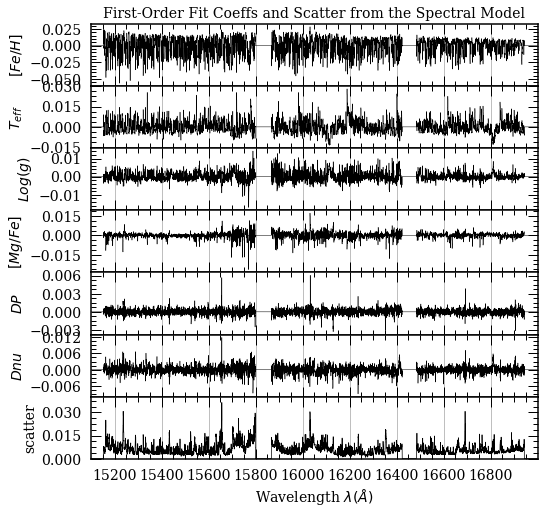

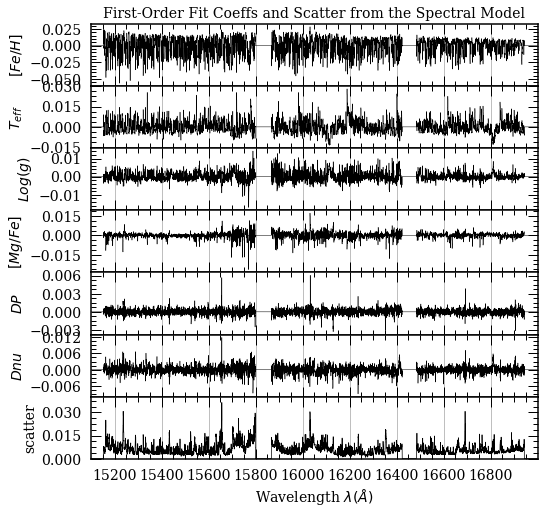

In [48]:
md.diagnostics_leading_coeffs(ds)


In [49]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [50]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [51]:
test_labels = ds.test_label_vals

In [52]:
ds.diagnostics_test_step_flagstars()

Reference label [Fe/H]
flagged 39 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label T_{eff}
flagged 36 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label Log(g)
flagged 46 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Reference label [Mg/Fe]
flagged 81 stars beyond 2-sig of ref labels
Saved list flagged_stars_3.txt
Reference label D P
flagged 16 stars beyond 2-sig of ref labels
Saved list flagged_stars_4.txt
Reference label D nu
flagged 55 stars beyond 2-sig of ref labels
Saved list flagged_stars_5.txt


Plotting every label against every other


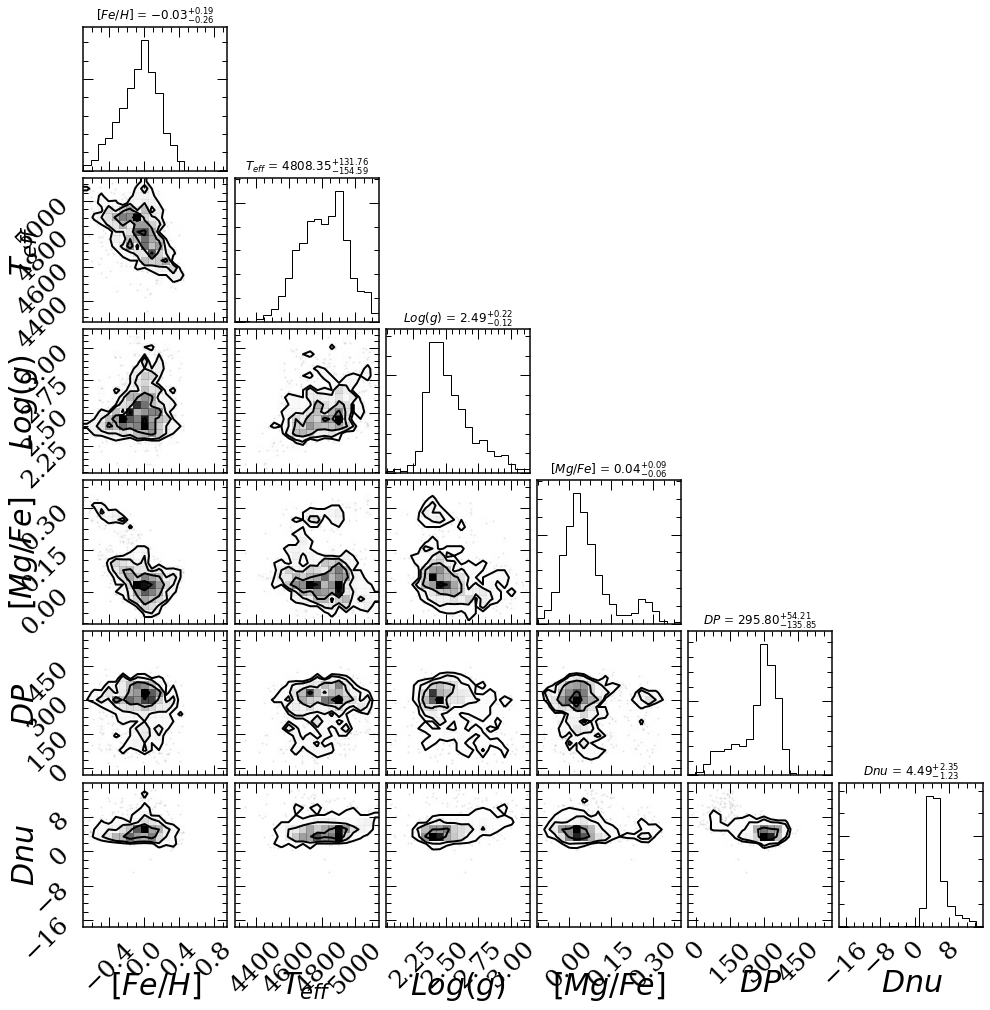

In [53]:
ds.diagnostics_survey_labels()

In [54]:
ds.tr_label=test_label

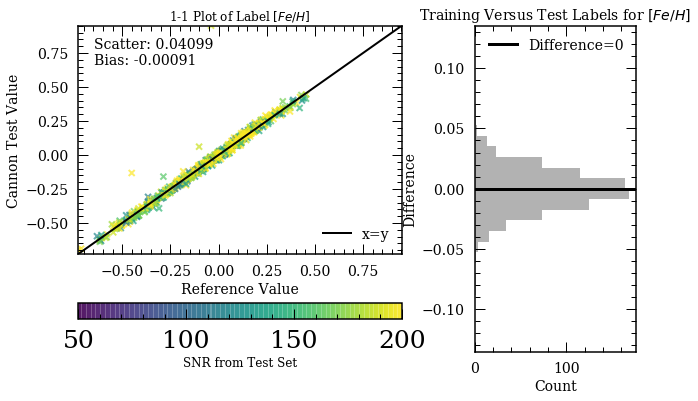

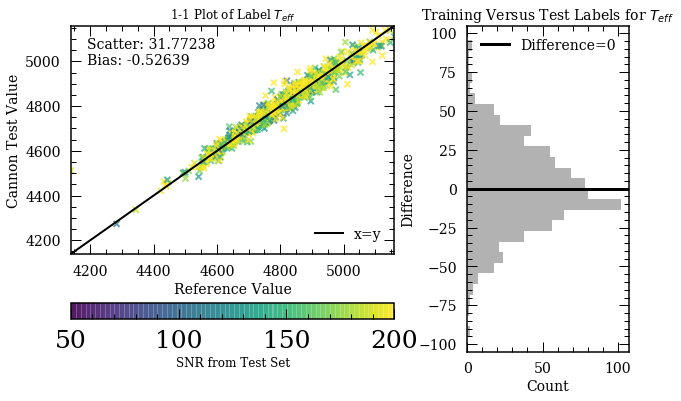

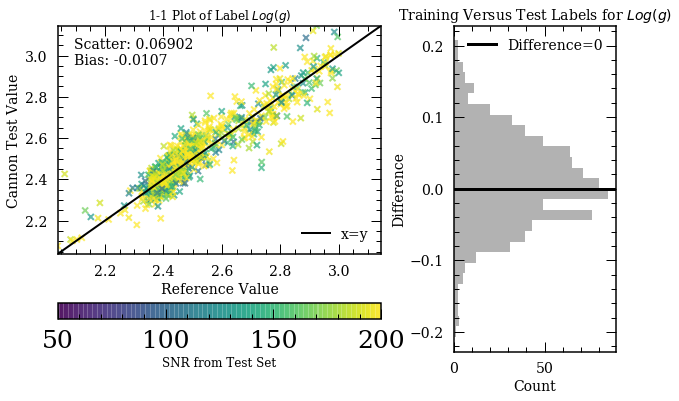

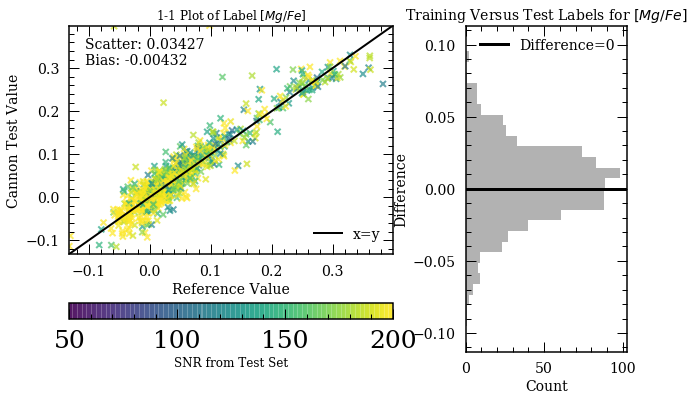

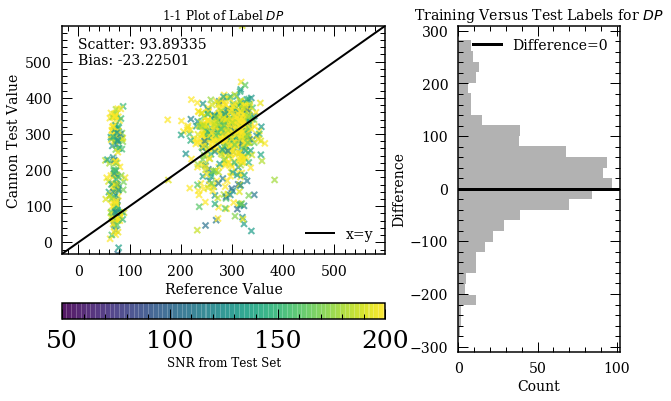

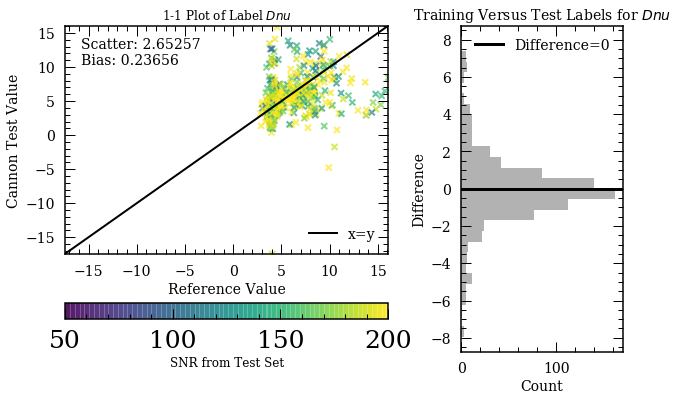

In [55]:
diagnostics_1to1(ds)

# Try training on same 3 labels

In [355]:
shuffle_inds = np.arange(len(tr_ID))
np.random.shuffle(shuffle_inds)
starnumbs=shuffle_inds[:50]

In [356]:
df_pick_3=df_pick[['TEFF','LOGG','M_H']]
tr_label = df_pick_3.reset_index(drop=True).values

In [357]:
test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar

In [358]:
#SNR = np.array([_SNR(*s) for s in zip(tr_flux, tr_ivar)])

In [344]:
#mask=SNR>150

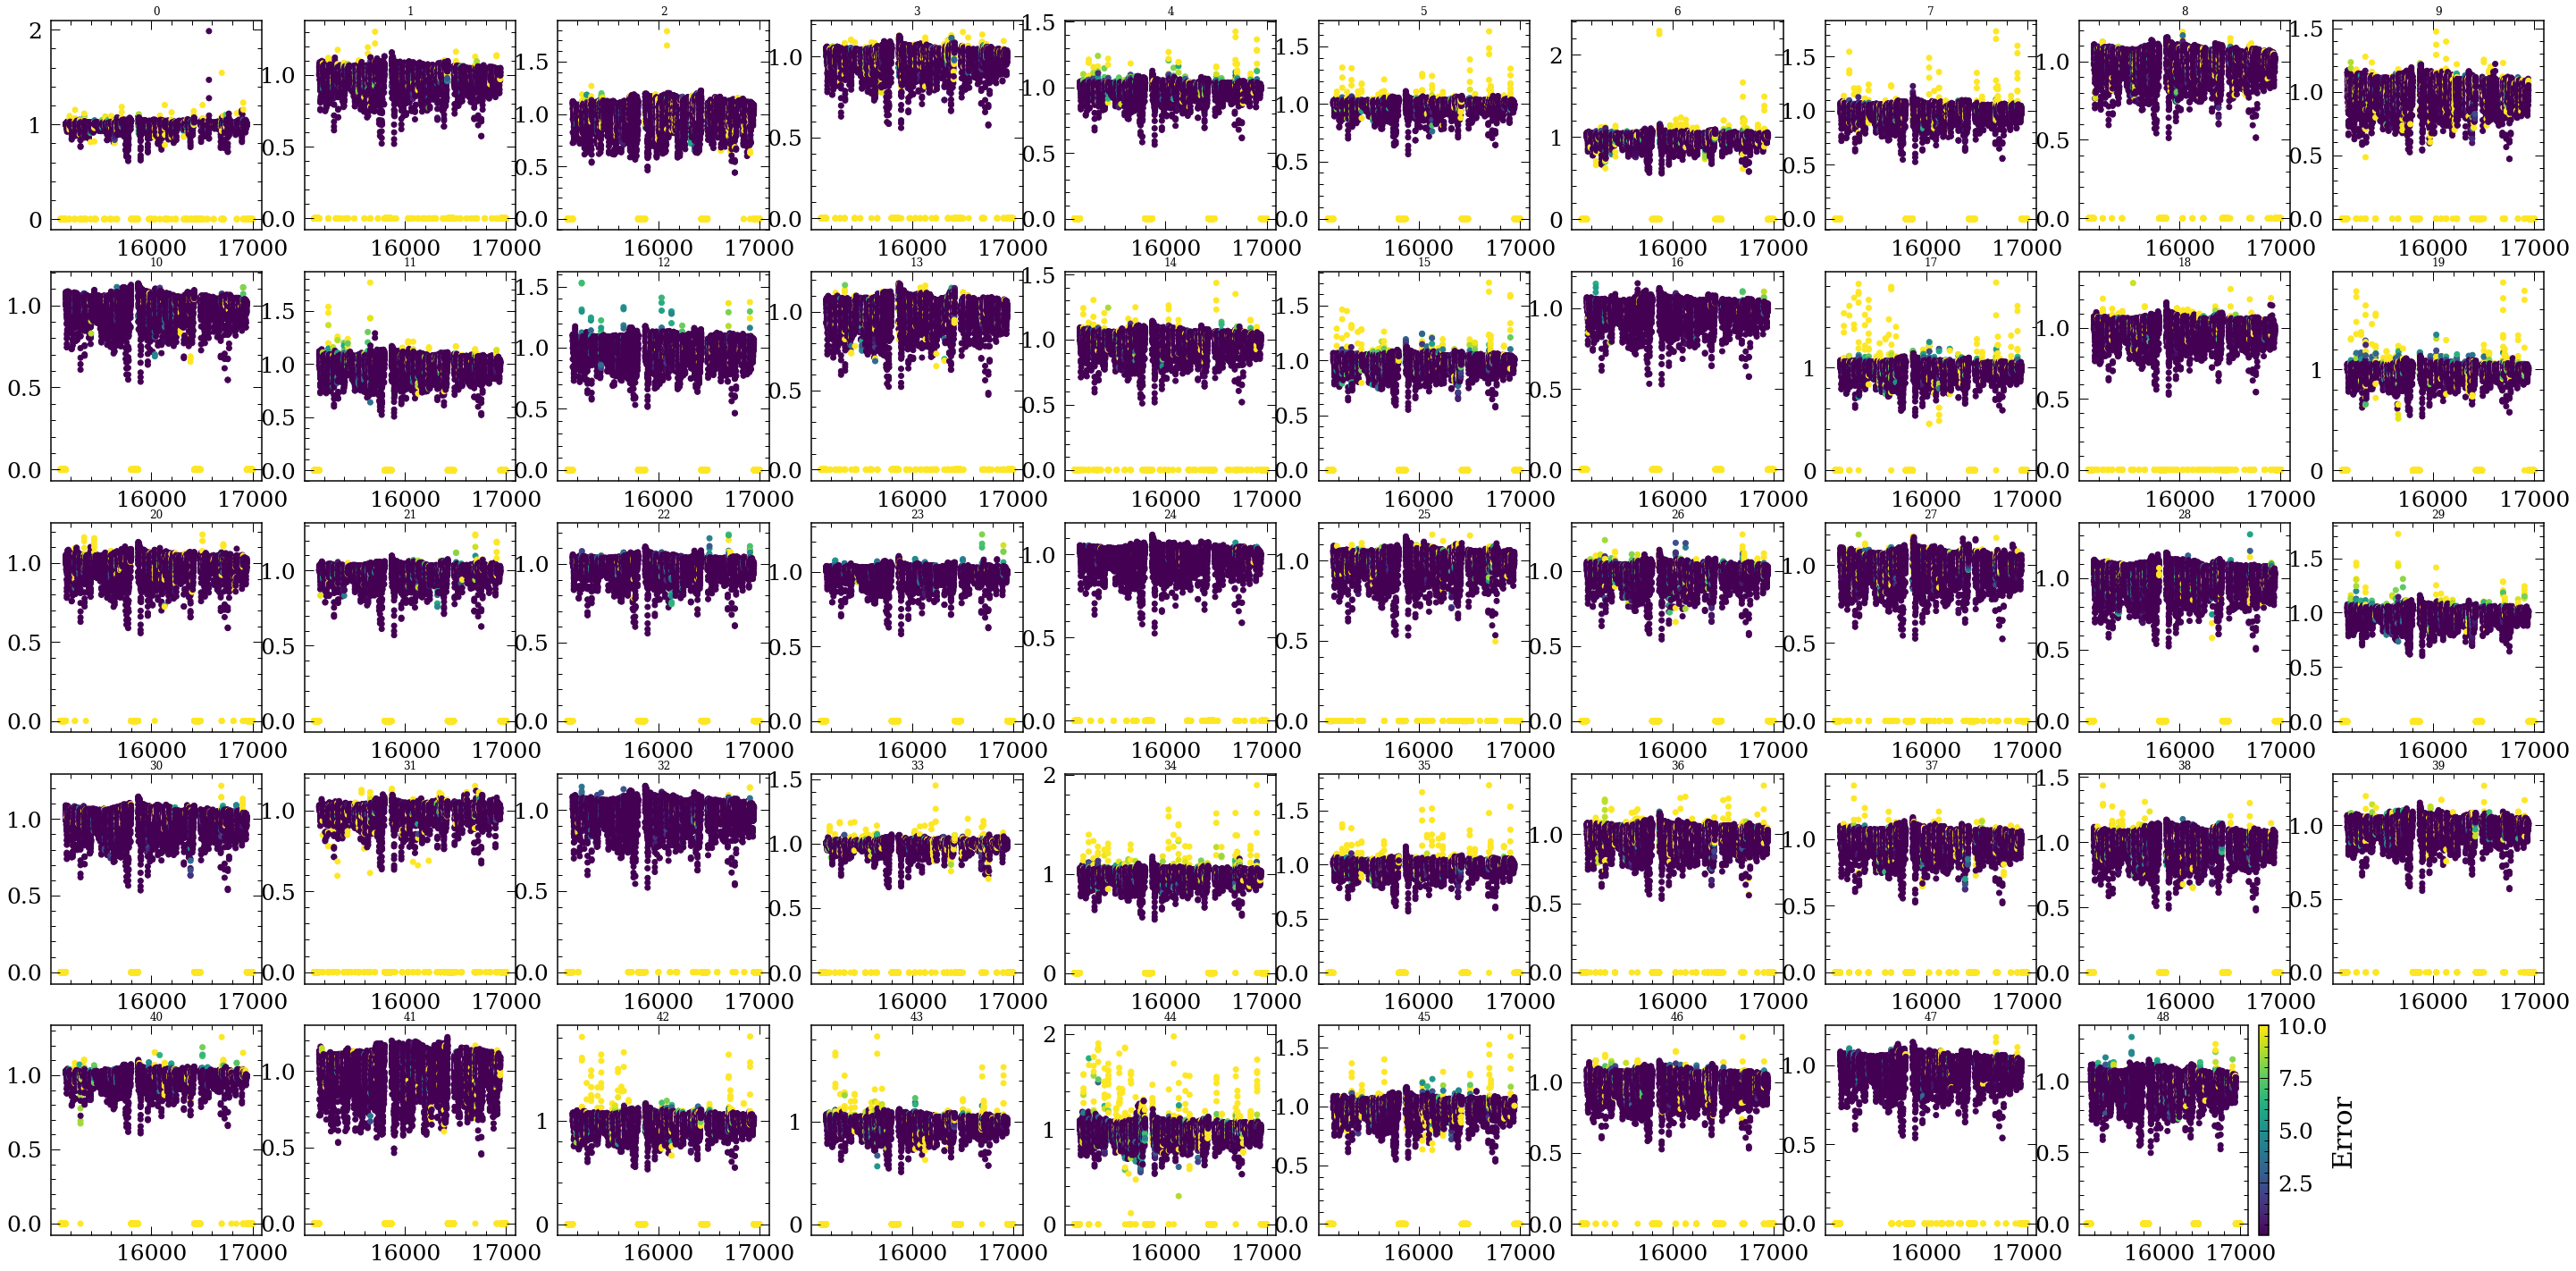

In [399]:
plt.figure(figsize=(len(starnumbs),25))
for i in range(len(starnumbs)-1):
    plt.subplot(5,int(np.ceil(len(starnumbs)/5)),i+1)
    plt.scatter(wl,test_flux[starnumbs[i],:],c=1/np.sqrt(test_ivar[starnumbs[i],:]))
    plt.title(str(i))
    if i==len(starnumbs)-2:
        cb=plt.colorbar()
        cb.set_label('Error')
    

In [331]:
#starnumbs=starnumbs[[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]

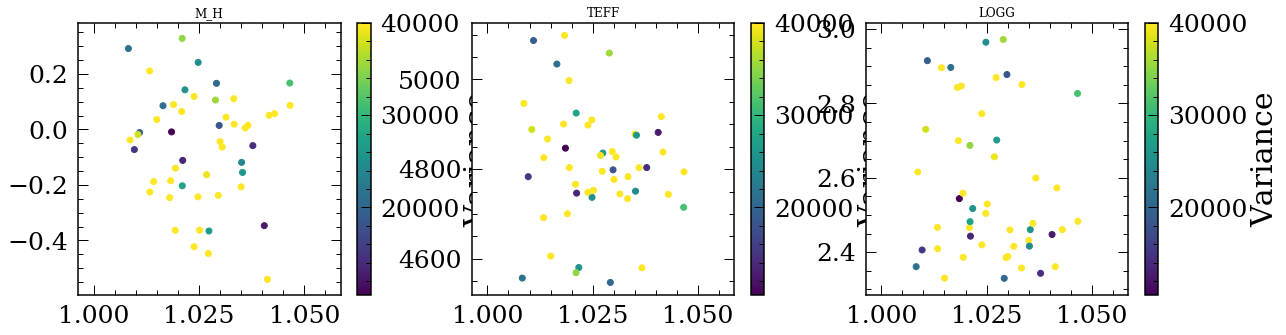

In [400]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(tr_flux[starnumbs,1000],df_pick['M_H'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('M_H')
cb=plt.colorbar()
cb.set_label('Variance')
plt.subplot(1,3,2)
plt.scatter(tr_flux[starnumbs,1000],df_pick['TEFF'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('TEFF')
cb=plt.colorbar()
cb.set_label('Variance')
plt.subplot(1,3,3)
plt.scatter(tr_flux[starnumbs,1000],df_pick['LOGG'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('LOGG')
cb=plt.colorbar()
cb.set_label('Variance')


In [401]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

ds = dataset.Dataset(wl, tr_ID[starnumbs], tr_flux[starnumbs,:], tr_ivar[starnumbs,:], tr_label[starnumbs,:], 
                     test_ID[starnumbs], test_flux[starnumbs,:], test_ivar[starnumbs,:], tr_label[starnumbs,:])
"""
ds = dataset.Dataset(wl, tr_ID[mask], tr_flux[mask,:], tr_ivar[mask,:], tr_label[mask,:], 
                     test_ID[mask], test_flux[mask,:], test_ivar[mask,:], tr_label[mask,:])

"""

Loading dataset
This may take a while...


'\nds = dataset.Dataset(wl, tr_ID[mask], tr_flux[mask,:], tr_ivar[mask,:], tr_label[mask,:], \n                     test_ID[mask], test_flux[mask,:], test_ivar[mask,:], tr_label[mask,:])\n\n'

In [402]:
ds.set_label_names(['TEFF','LOGG','M_H'])


Diagnostic for SNRs of reference and survey objects


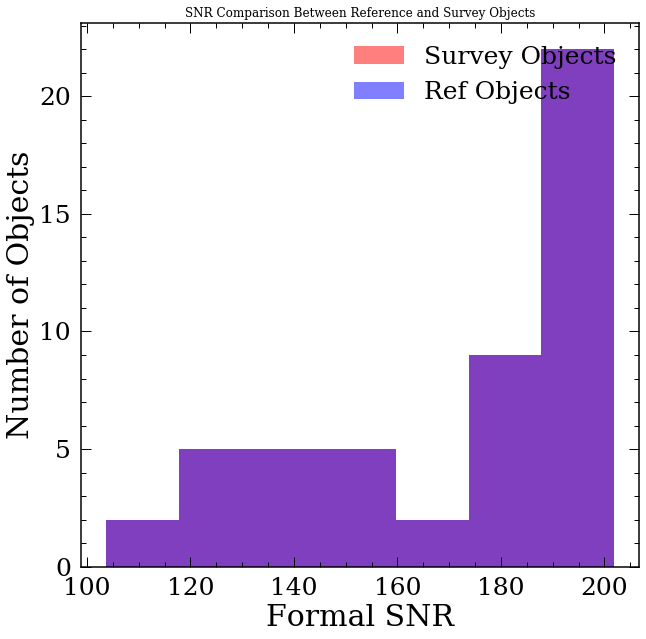

In [403]:
fig = ds.diagnostics_SNR()

Plotting every label against every other


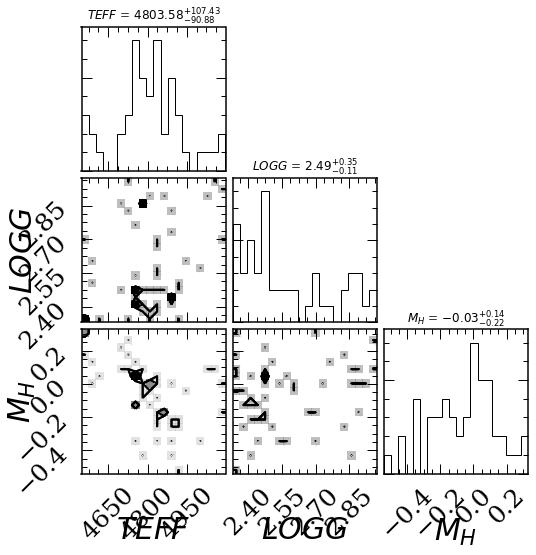

In [404]:
fig = ds.diagnostics_ref_labels()

In [405]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x2514f0be0> <TheCannon.dataset.Dataset object at 0x241396c50>
Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


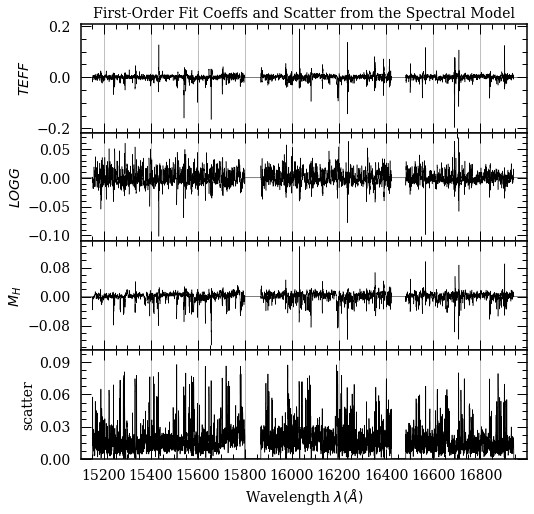

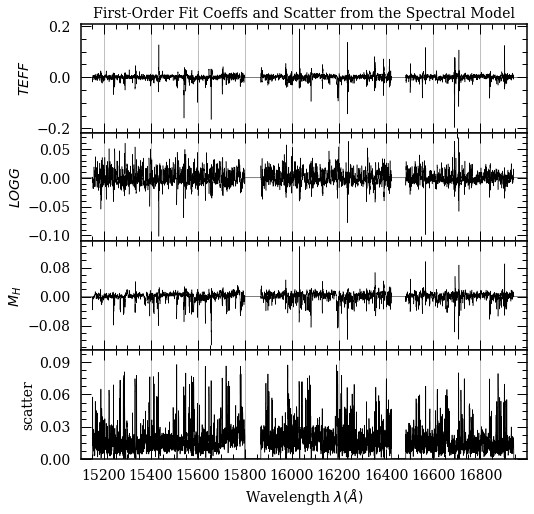

In [406]:
md.diagnostics_leading_coeffs(ds)


In [407]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [408]:
test_labels = ds.test_label_vals

Plotting every label against every other


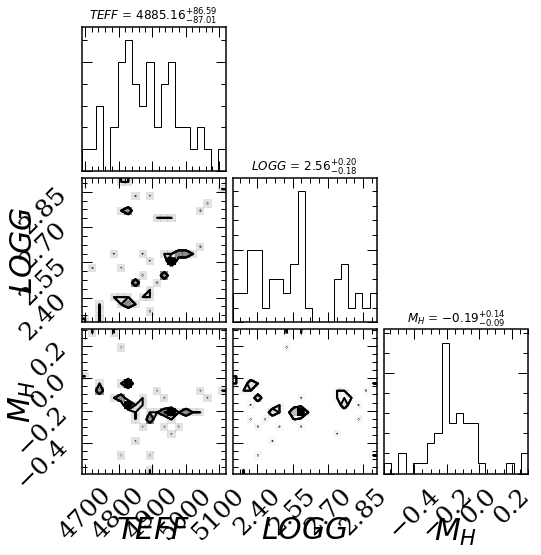

In [409]:
ds.diagnostics_survey_labels()

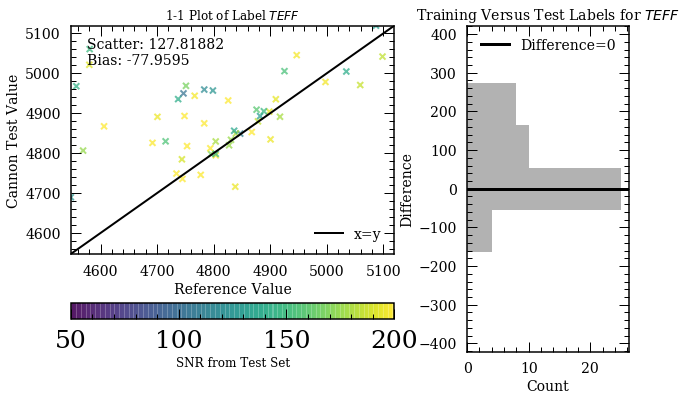

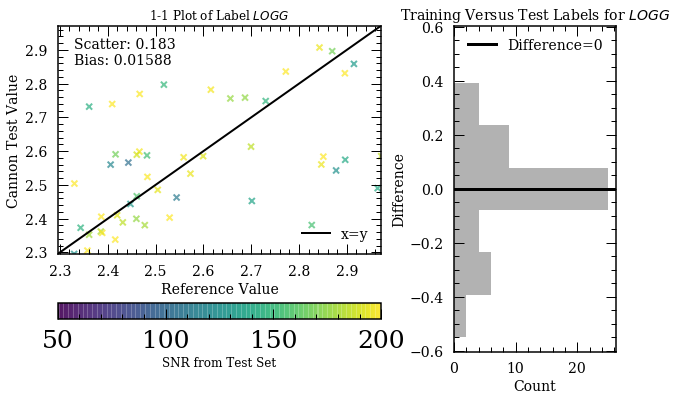

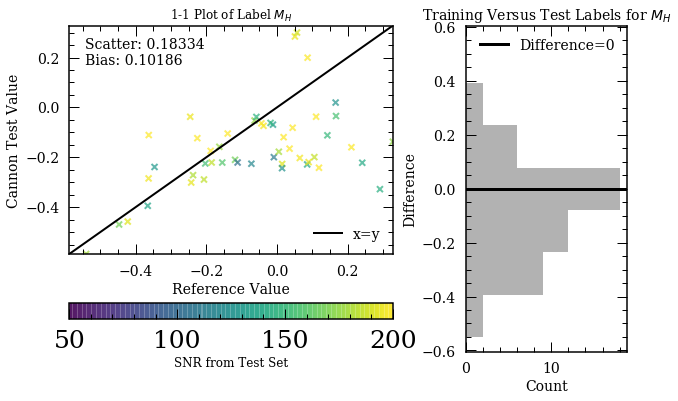

In [410]:
diagnostics_1to1(ds)

# Training on a small range of wl

In [436]:
m_wl_min=wl>15200
m_wl_max=wl<15300

mwl=m_wl_min&m_wl_max

In [437]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

tr_flux_wl=tr_flux[:,mwl]
tr_ivar_wl=tr_ivar[:,mwl]

test_flux=tr_flux_wl
test_ivar=tr_ivar_wl


ds = dataset.Dataset(wl[mwl], tr_ID[starnumbs], tr_flux_wl[starnumbs,:], tr_ivar_wl[starnumbs,:], 
                     tr_label[starnumbs,:], test_ID[starnumbs], test_flux[starnumbs,:], 
                     test_ivar[starnumbs,:], tr_label[starnumbs,:])
"""
ds = dataset.Dataset(wl, tr_ID[mask], tr_flux[mask,:], tr_ivar[mask,:], tr_label[mask,:], 
                     test_ID[mask], test_flux[mask,:], test_ivar[mask,:], tr_label[mask,:])

"""

Loading dataset
This may take a while...


'\nds = dataset.Dataset(wl, tr_ID[mask], tr_flux[mask,:], tr_ivar[mask,:], tr_label[mask,:], \n                     test_ID[mask], test_flux[mask,:], test_ivar[mask,:], tr_label[mask,:])\n\n'

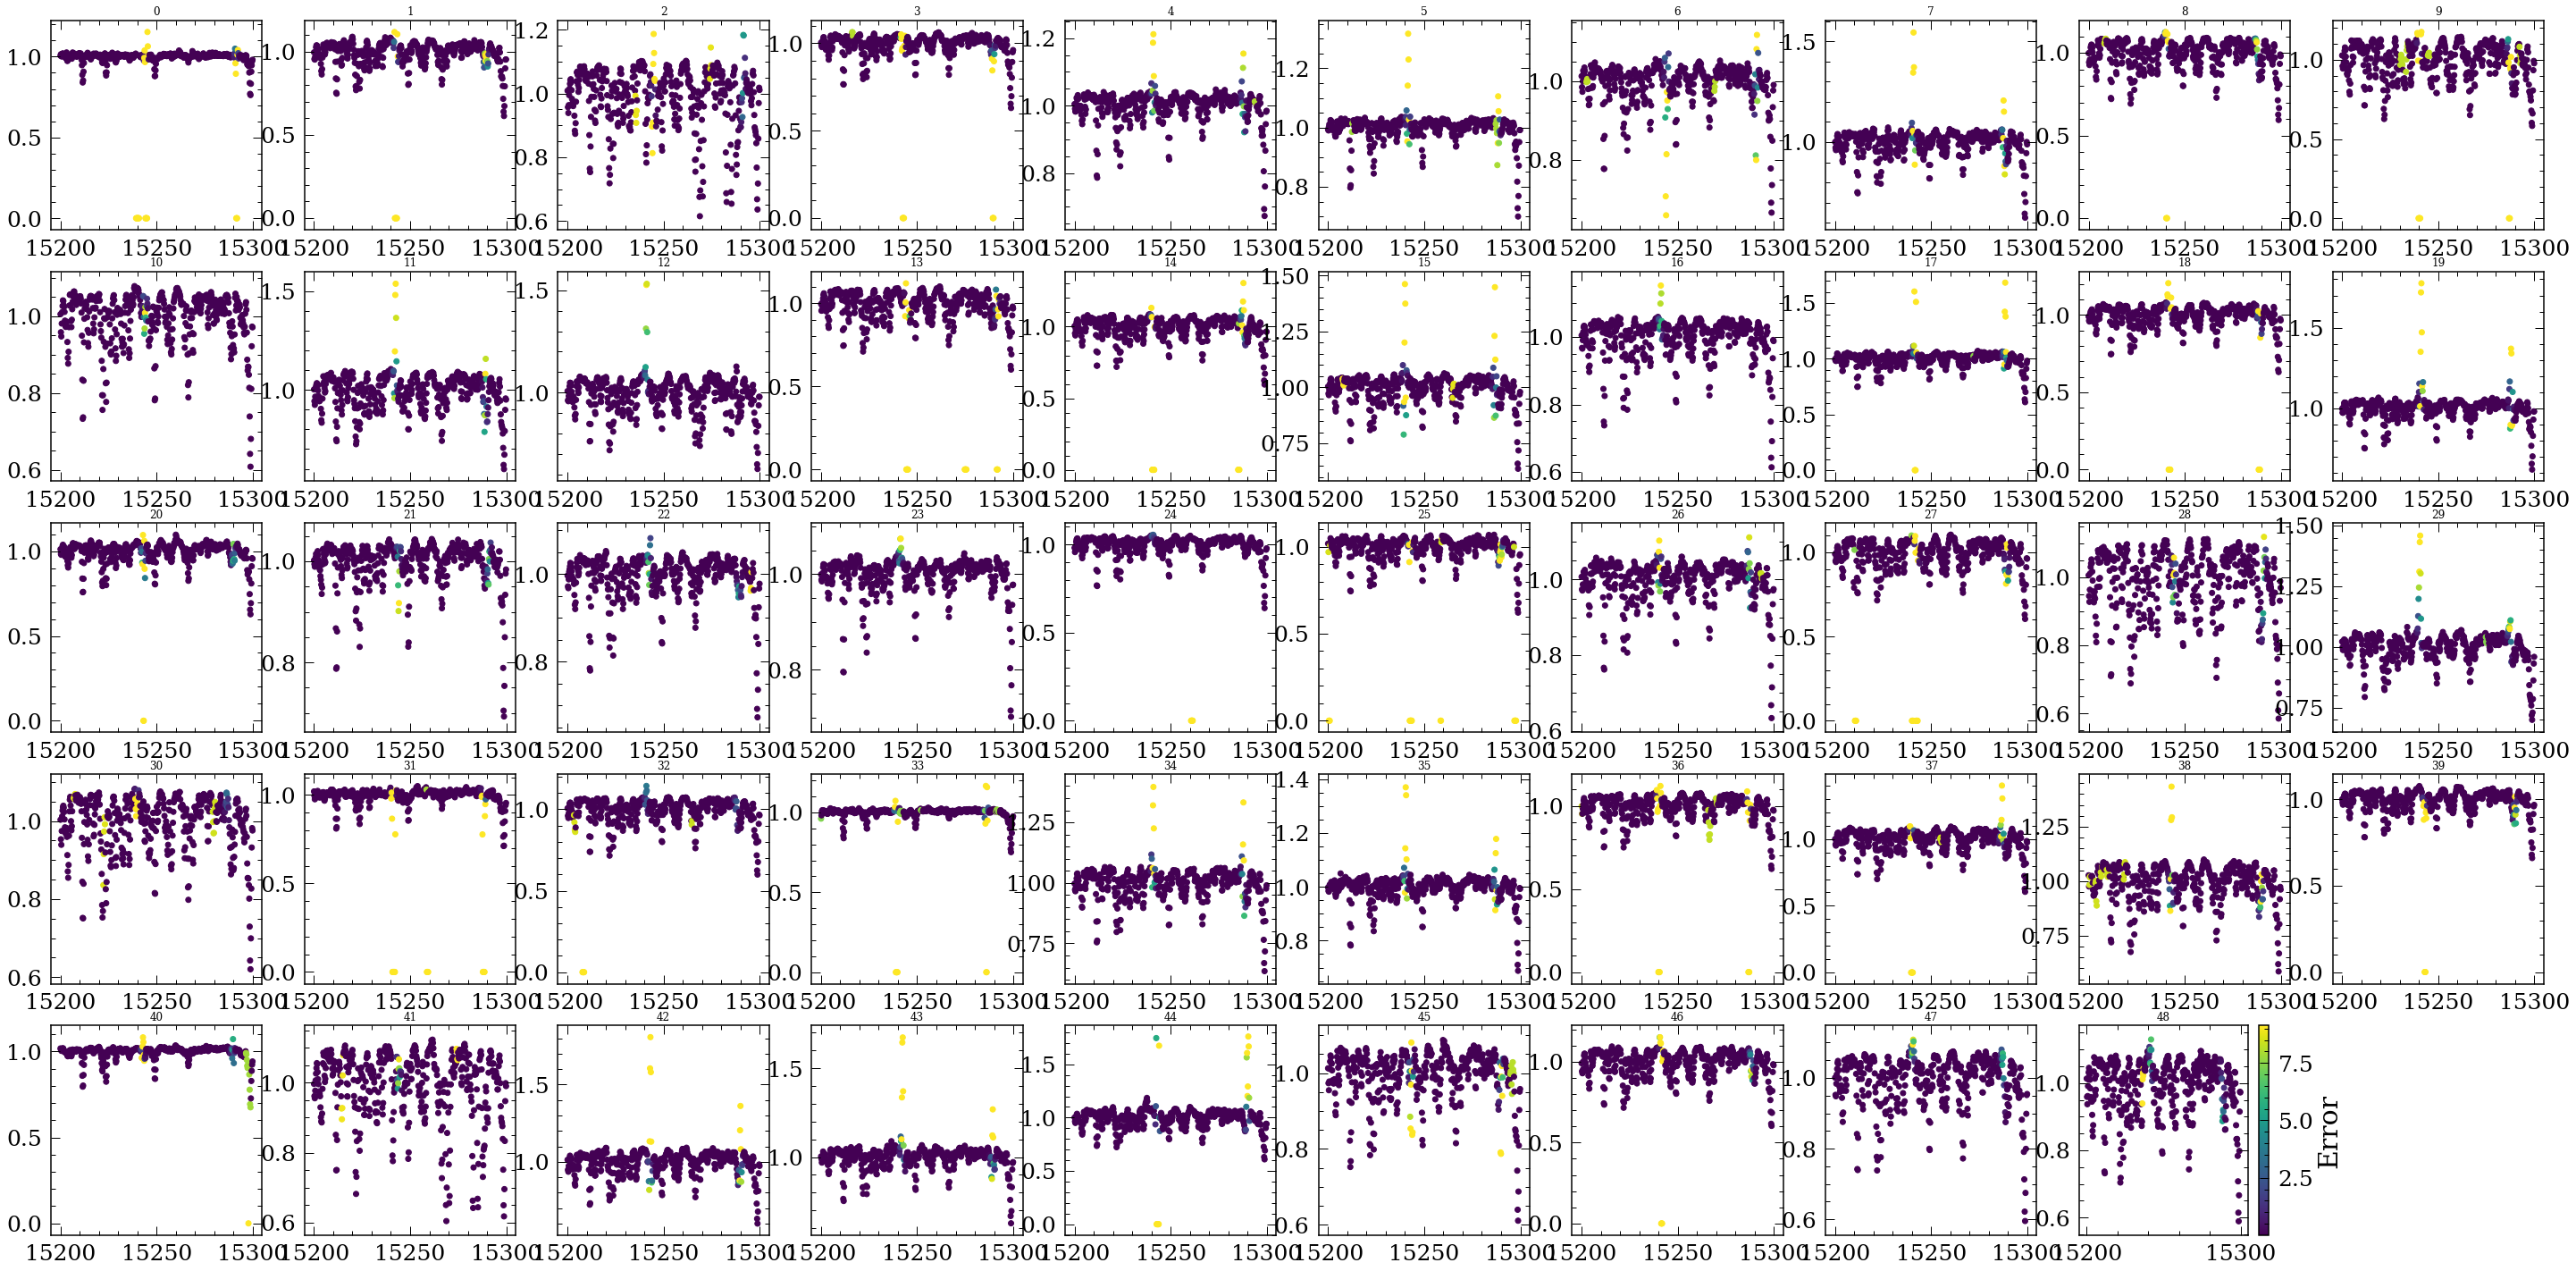

In [438]:
plt.figure(figsize=(len(starnumbs),25))
for i in range(len(starnumbs)-1):
    plt.subplot(5,int(np.ceil(len(starnumbs)/5)),i+1)
    plt.scatter(wl[mwl],test_flux[starnumbs[i],:],c=1/np.sqrt(test_ivar[starnumbs[i],:]))
    plt.title(str(i))
    if i==len(starnumbs)-2:
        cb=plt.colorbar()
        cb.set_label('Error')
    

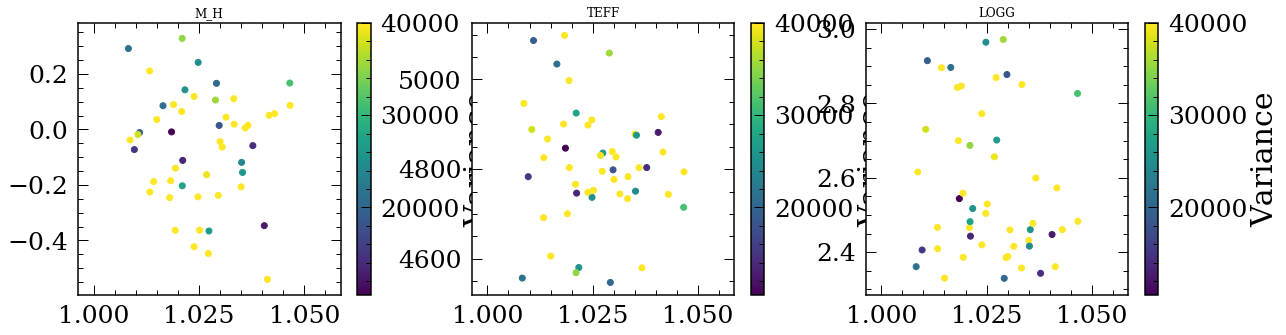

In [439]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(tr_flux[starnumbs,1000],df_pick['M_H'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('M_H')
cb=plt.colorbar()
cb.set_label('Variance')
plt.subplot(1,3,2)
plt.scatter(tr_flux[starnumbs,1000],df_pick['TEFF'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('TEFF')
cb=plt.colorbar()
cb.set_label('Variance')
plt.subplot(1,3,3)
plt.scatter(tr_flux[starnumbs,1000],df_pick['LOGG'].iloc[starnumbs],c=tr_ivar[starnumbs,1000])
plt.title('LOGG')
cb=plt.colorbar()
cb.set_label('Variance')



In [440]:
ds.set_label_names(['TEFF','LOGG','M_H'])

Diagnostic for SNRs of reference and survey objects


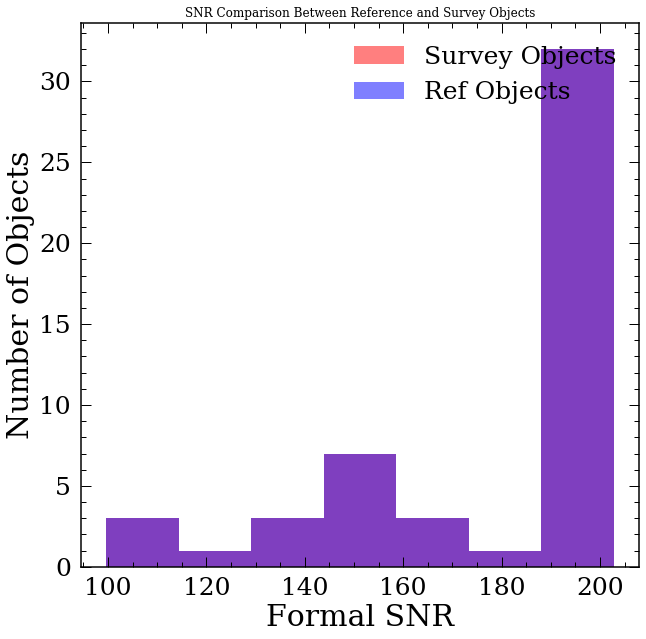

In [441]:
fig = ds.diagnostics_SNR()

Plotting every label against every other


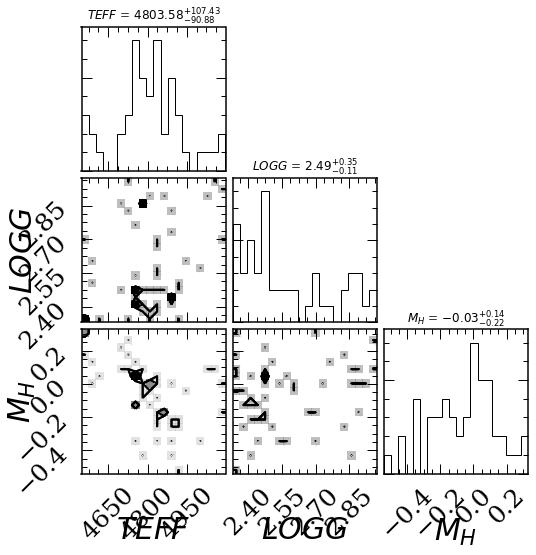

In [442]:
fig = ds.diagnostics_ref_labels()

In [443]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x1cc4ffa58> <TheCannon.dataset.Dataset object at 0x24c2572e8>
Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


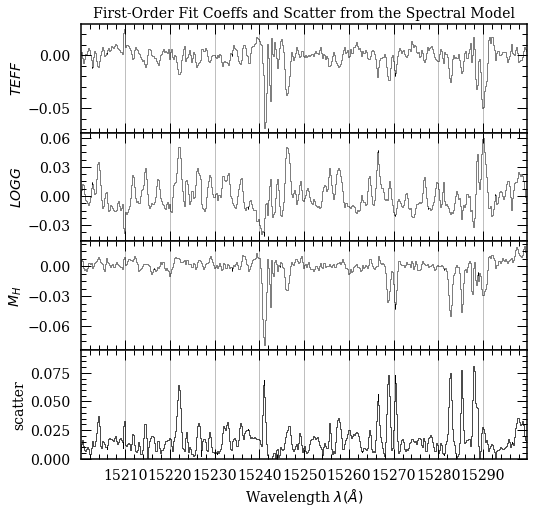

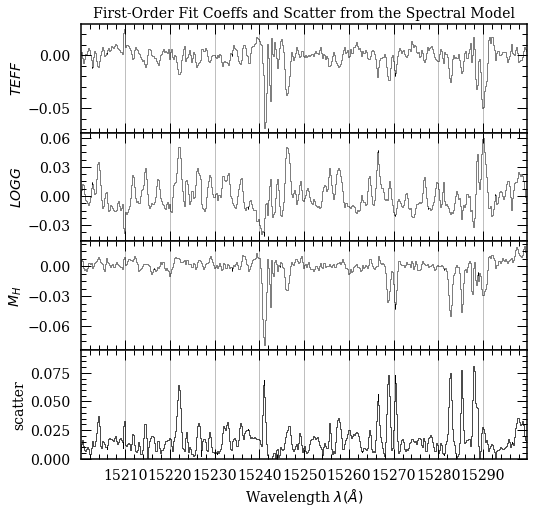

In [444]:
md.diagnostics_leading_coeffs(ds)



In [445]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [446]:
test_labels = ds.test_label_vals

Plotting every label against every other


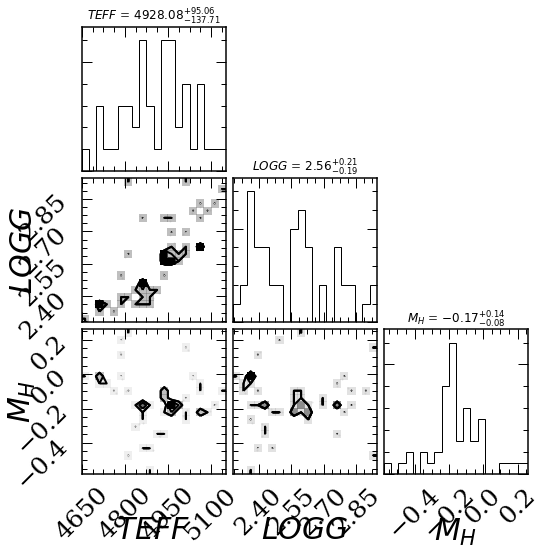

In [447]:
ds.diagnostics_survey_labels()

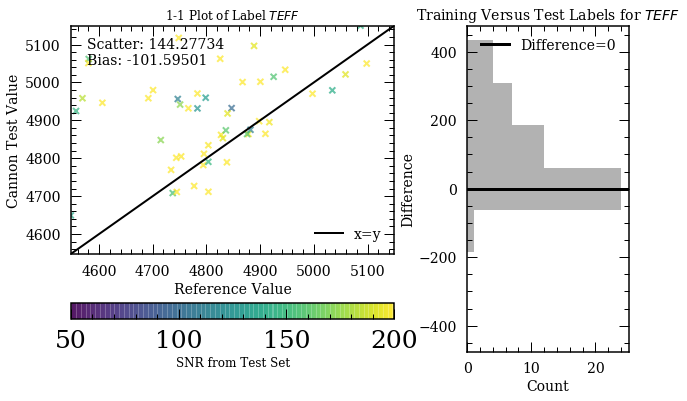

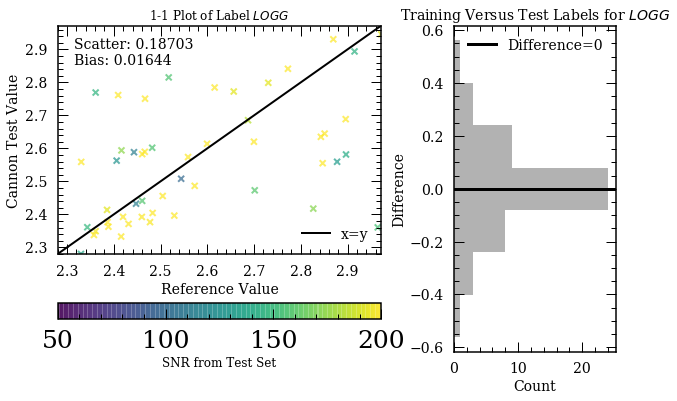

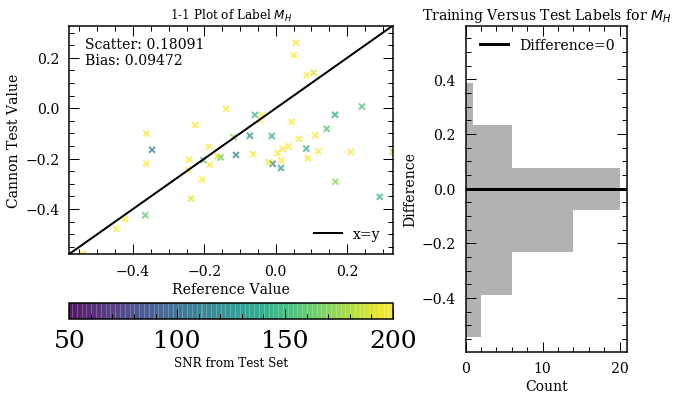

In [448]:
diagnostics_1to1(ds)

# Try training on same test/training set

In [21]:
test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar

In [23]:
from TheCannon import dataset 
ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, test_ID, test_flux, test_ivar,tr_label)

Loading dataset
This may take a while...


In [24]:
ds.set_label_names(['[Fe/H]','T_{eff}','Log(g)','[Mg/Fe]','D P','D \nu'])

Diagnostic for SNRs of reference and survey objects


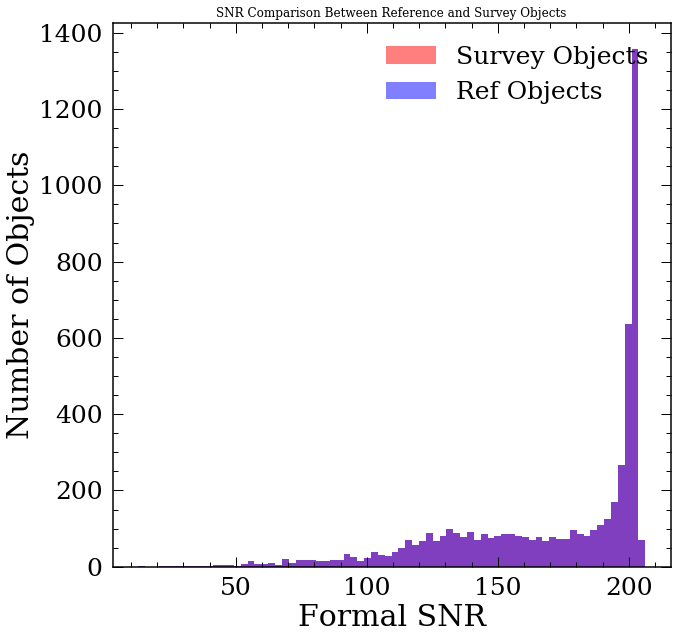

In [28]:
fig = ds.diagnostics_SNR()

Plotting every label against every other


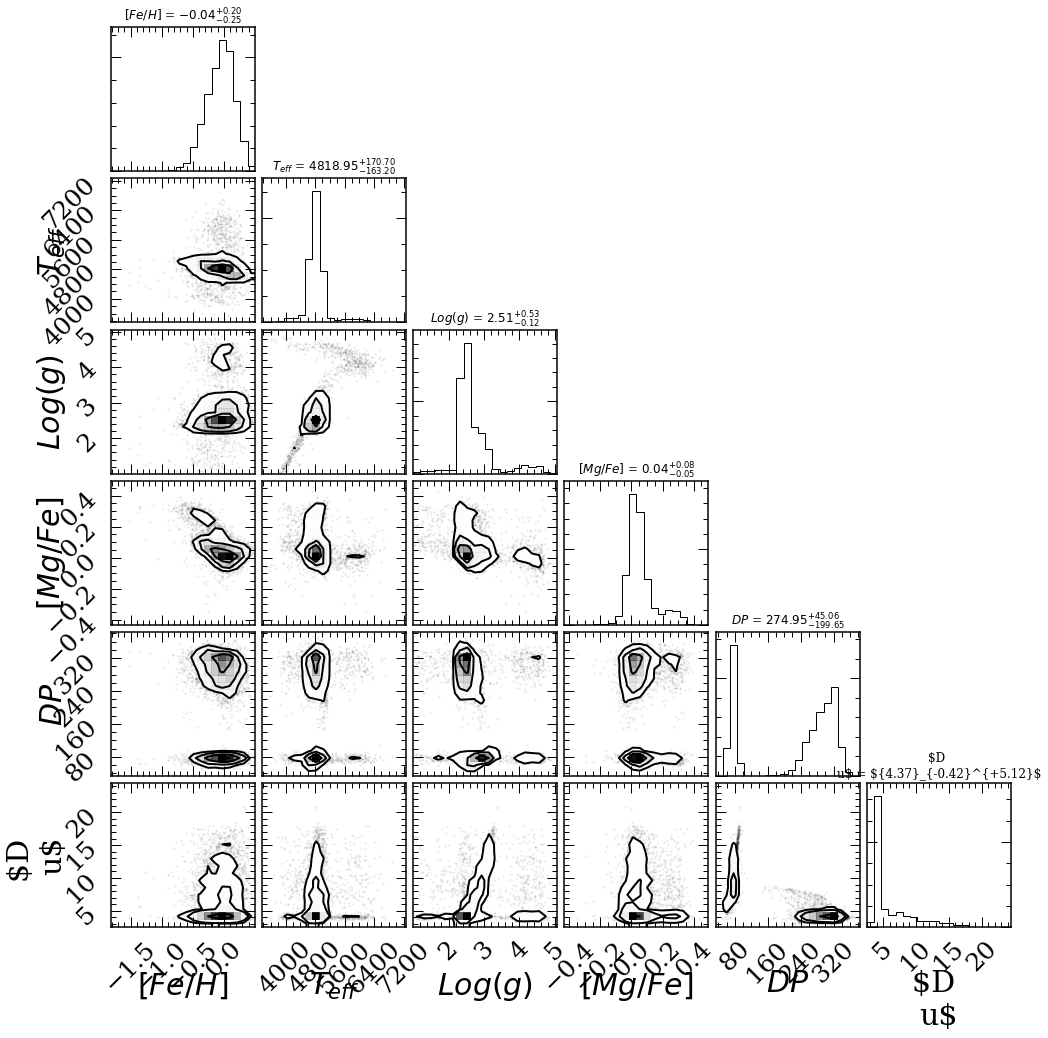

In [30]:
fig = ds.diagnostics_ref_labels()

In [34]:
ds.ranges = [[371,3192], [3697,5997], [6461,8255]]

In [35]:
pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)

  0%|          | 0/5488 [00:00<?, ?it/s]

Continuum normalizing the tr set using running quantile...
##########################################################
@Bo Zhang: you will use only 1 process ...
           i.e., the original TheCannon version
##########################################################
contnorm.py: continuum norm using running quantile
Taking spectra in 3 chunks


100%|██████████| 5488/5488 [08:41<00:00, 10.53it/s]


In [36]:
contmask = ds.make_contmask(tr_flux, tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 3 regions
Target frac: 0.07
200 out of 2821 pixels identified as continuum
Cuts: f_cut 0.007000000000000005, sig_cut 0.007000000000000005
Target frac: 0.07
163 out of 2300 pixels identified as continuum
Cuts: f_cut 0.007300000000000006, sig_cut 0.007300000000000006
Target frac: 0.07
126 out of 1794 pixels identified as continuum
Cuts: f_cut 0.0051, sig_cut 0.0051
489 pixels returned as continuum


In [37]:
ds.ranges = [[371,3192], [3697,5500], [5500,5997], [6461,8255]]
contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 4 regions
Target frac: 0.07
209 out of 2821 pixels identified as continuum
Cuts: f_cut 0.0029999999999999988, sig_cut 0.0029999999999999988
Target frac: 0.07
130 out of 1803 pixels identified as continuum
Cuts: f_cut 0.004099999999999998, sig_cut 0.004099999999999998
Target frac: 0.07
38 out of 497 pixels identified as continuum
Cuts: f_cut 0.005300000000000001, sig_cut 0.005300000000000001
Target frac: 0.07
129 out of 1794 pixels identified as continuum
Cuts: f_cut 0.0035999999999999977, sig_cut 0.0035999999999999977
506 pixels returned as continuum


In [38]:
ds.set_continuum(contmask)

In [39]:
cont = ds.fit_continuum(3, "sinusoid")

Fitting Continuum...
Fitting Continuum in 4 Regions...


/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [40]:
norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

taking spectra in 4 regions


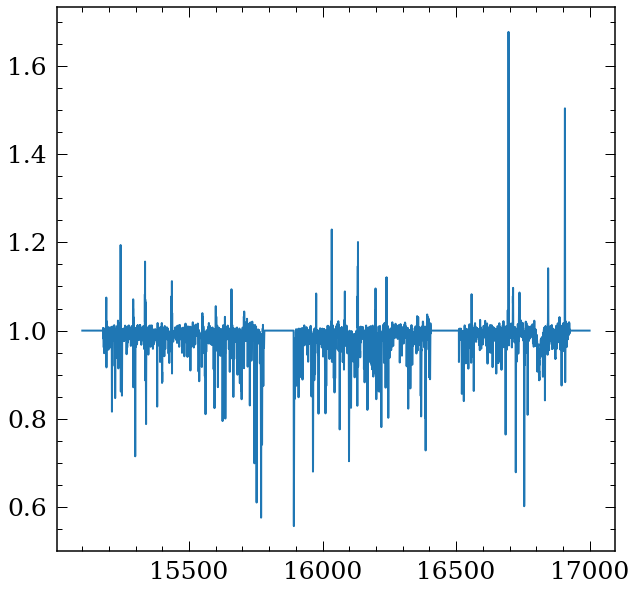

In [47]:
plt.plot(wl, norm_tr_flux[10,:])

In [42]:
ds.tr_flux = norm_tr_flux
ds.tr_ivar = norm_tr_ivar
ds.test_flux = norm_test_flux
ds.test_ivar = norm_test_ivar

In [50]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)

In [52]:
md.fit(ds)

<TheCannon.model.CannonModel object at 0x1d6930a400> <TheCannon.dataset.Dataset object at 0x1a45e693c8>
Done training model. 


In [53]:
md.diagnostics_contpix(ds)


Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_0.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_1.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_2.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_3.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_4.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_5.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_6.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_7.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_8.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_9.png


Diagnostic plot: leading coeffs and scatters across wavelength.


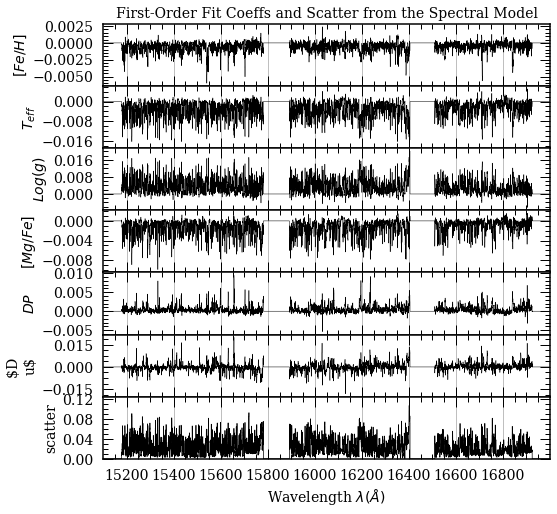

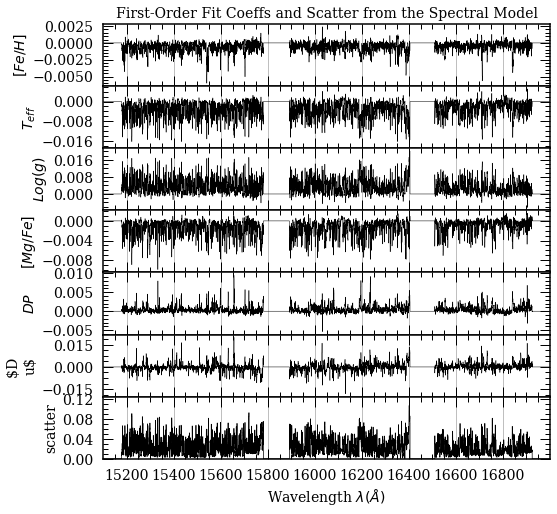

In [54]:
md.diagnostics_leading_coeffs(ds)


In [55]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [56]:
label_errs = md.infer_labels(ds)

Inferring Labels
Error - curve_fit failed


/Users/lucy/anaconda3/lib/python3.7/site-packages/TheCannon/infer_labels.py:113: RuntimeWarning: invalid value encountered in sqrt
  errs_all[jj,:] = np.sqrt(covs.diagonal())


Error - curve_fit failed
Error - curve_fit failed


In [57]:
test_labels = ds.test_label_vals

Reference label [Fe/H]
flagged 966 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label T_{eff}
flagged 1229 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label Log(g)
flagged 2082 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Reference label [Mg/Fe]
flagged 2407 stars beyond 2-sig of ref labels
Saved list flagged_stars_3.txt
Reference label D P
flagged 254 stars beyond 2-sig of ref labels
Saved list flagged_stars_4.txt
Reference label D 
u
flagged 2117 stars beyond 2-sig of ref labels
Saved list flagged_stars_5.txt
Plotting every label against every other


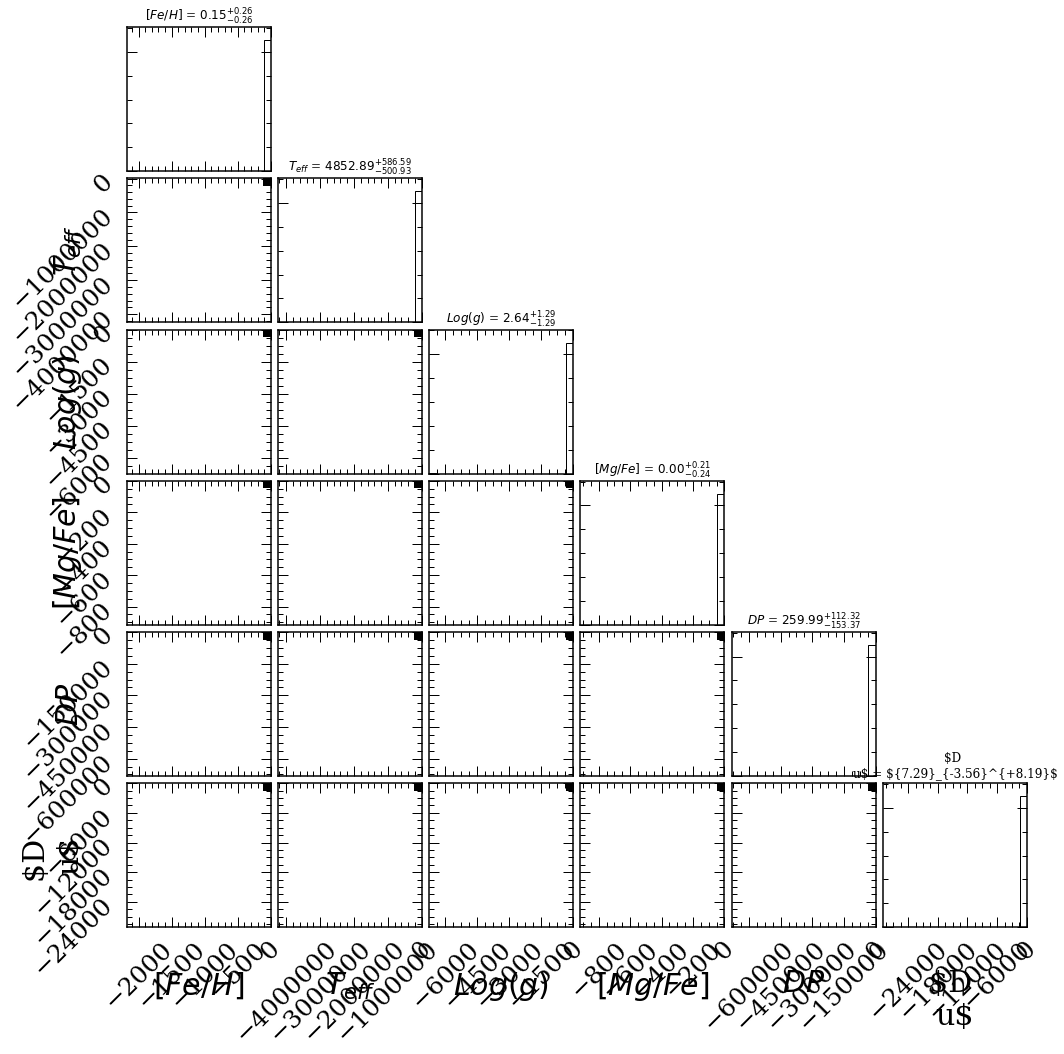

In [58]:
ds.diagnostics_test_step_flagstars()
ds.diagnostics_survey_labels()

In [171]:
import matplotlib.gridspec as gridspec
def diagnostics_1to1(ds, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        label_names = ds.get_plotting_labels()
        nlabels = len(label_names)
        reference_labels = ds.test_label
        test_labels = ds.test_label_vals

        for i in range(nlabels):
            snr = ds.test_SNR
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            
            m1=cannon>-500
            m2=orig>-500
            m=m1&m2
            
            orig, cannon, snr=orig[m],cannon[m],snr[m]
            
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')

            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            figname_full = "%s_%s.png" %(figname, i)
            if i==3:
                return orig, cannon


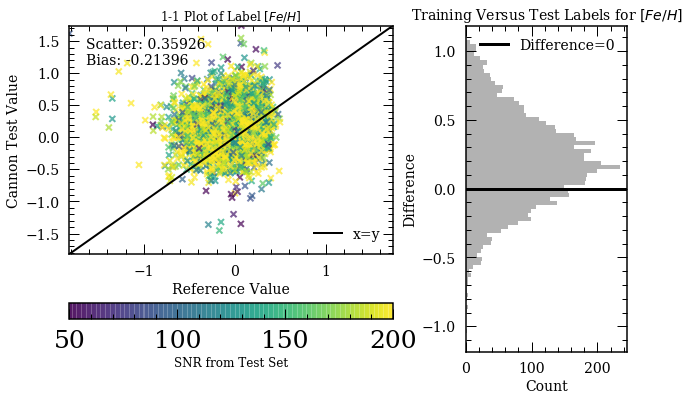

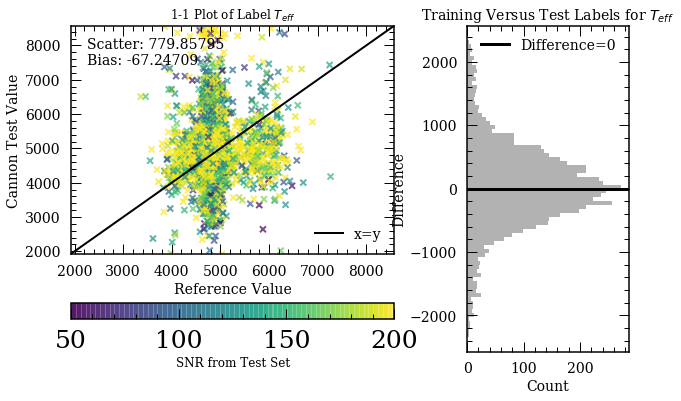

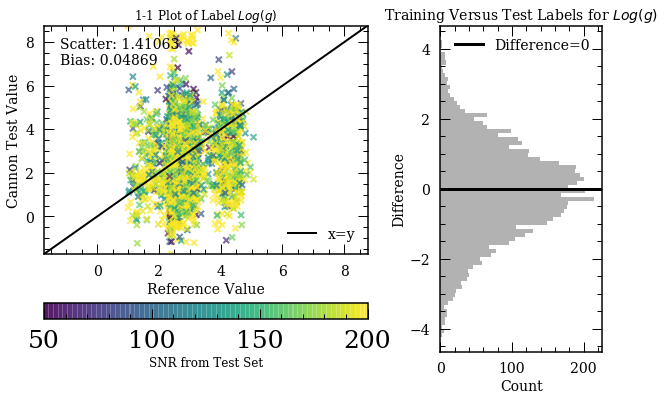

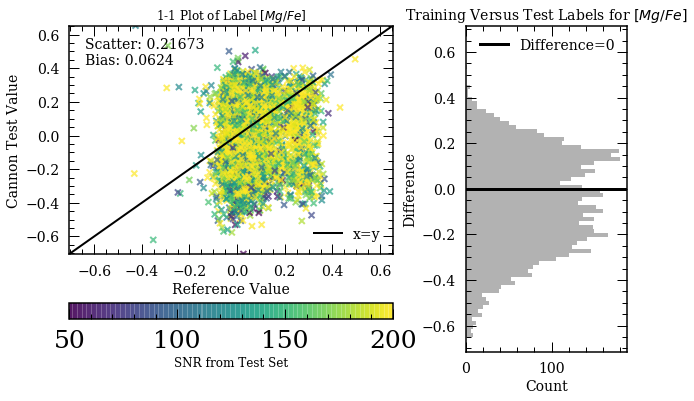

In [60]:
orig,cannon=diagnostics_1to1(ds)


In [61]:
ds.diagnostics_1to1()

[[-4.44191545e-01  5.12068408e+03  2.44442964e+00  4.64547276e-02
   3.04900000e+02  3.96000000e+00]
 [ 1.93008453e-01  4.49145898e+03  2.24674630e+00 -3.01283002e-02
   2.51200000e+02  4.45000000e+00]
 [ 2.31188446e-01  4.63553906e+03  2.75714469e+00  4.88476902e-02
   7.01000000e+01  6.95000000e+00]
 ...
 [-3.91441554e-01  4.75196143e+03  2.34760928e+00  2.96531707e-01
   2.65200000e+02  3.78000000e+00]
 [-7.47951567e-01  4.81007129e+03  2.60499001e+00  2.92891681e-01
   2.93200000e+02  4.41000000e+00]
 [-1.20751545e-01  4.69999463e+03  2.35588813e+00  2.44631708e-01
   2.94300000e+02  3.85000000e+00]] [[ 1.83580252e-01  4.79646127e+03  3.42048122e+00 -3.04075903e-01
   8.57858351e+01  1.01386601e+01]
 [-3.46532541e-01  5.53803292e+03  2.64564528e+00  1.05399130e-01
   2.90489055e+02  7.69507154e+00]
 [ 1.10011989e-01  6.72083981e+03  5.56376370e+00 -1.12600704e-01
   3.68231622e+02  2.80829122e+00]
 ...
 [-1.72498731e-01  5.33248368e+03  1.83799308e+00  1.67367094e-01
   3.23906587e